# BT2101 Group Project

T05
- Mitchell Kwong
- Valary Lim Wan Qian (A0190343L)
- Lai Yan Jean (A0190326J)
- Koay Tze Min (A0188851N)
- Lee Jing Xuan (A0189467H)

# Import packages and integerate drive

In [0]:
%load_ext rpy2.ipython

import os
from pathlib import Path
import warnings

warnings.filterwarnings('ignore') # suppressed warnings to make this neater, turn back on if needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set() # Nicer plots

from google.colab import drive

drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
%%R

library(tidyverse)

# Exploratory data analysis

In [0]:
%%R

#### EXPLORATORY DATA ANALYSIS ####
# Split the discrete and continuous data
discrete_data <- select(data, SEX, EDUCATION, MARRIAGE, DEFAULT)
continuous_data <- select(data, LIMIT_BAL, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6,
                          BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
                          PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, DEFAULT)

# Continuous Data #
# Summary
summary(continuous_data[, 1:20])
continuous_data %>% describe() # there are no missing values in the data

# Hypothesis Test for Significance
tmat <- data.frame(tstat = numeric(), pvalue = numeric())
for (i in 1:20) {
  result <- t.test(continuous_data[,i] ~ continuous_data$DEFAULT, var.equal = TRUE)
  tmat[i, 1] = result$statistic
  tmat[i, 2] = result$p.value
}
tmat <- cbind(names(continuous_data[,1:20]), tmat)
names(tmat) <- c("attribute", "t-statistic", "p-value")
tmat$significant <- ifelse(tmat$`p-value` < 0.05, 1, 0)

# Distribution: Limit Balance
boxplot(continuous_data$LIMIT_BAL, xlab = "Limit Balance", ylab = "NT Dollar", col = "darkslateblue")
ggplot(continuous_data, aes(x = LIMIT_BAL)) + geom_histogram(bins = 50, fill="darkslateblue")

# Distribution: Age
boxplot(continuous_data$AGE, xlab = "Age", ylab = "Years", col = "darkslateblue")
ggplot(continuous_data, aes(x = AGE)) + geom_histogram(bins = 50, fill="darkslateblue")

# Distribution: Payment Records
boxplot(continuous_data[,3:8], xlab = "Payment Records", col = "darkslateblue")

ggplot(continuous_data, aes(x = PAY_0)) + geom_histogram(bins = 10, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_2)) + geom_histogram(bins = 10, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_3)) + geom_histogram(bins = 10, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_4)) + geom_histogram(bins = 10, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_5)) + geom_histogram(bins = 10, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_6)) + geom_histogram(bins = 10, fill="darkslateblue")

# Distribution: Bill Amount
boxplot(continuous_data[,9:14], xlab = "Bill Amount", ylab = "NT Dollar", col = "darkslateblue")

ggplot(continuous_data, aes(x = BILL_AMT1)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = BILL_AMT2)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = BILL_AMT3)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = BILL_AMT4)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = BILL_AMT5)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = BILL_AMT6)) + geom_histogram(bins = 30, fill="darkslateblue")

# Distribution: Payment Amount
boxplot(continuous_data[,15:20], xlab = "Payment Amount", ylab = "NT Dollar", col = "darkslateblue")

ggplot(continuous_data, aes(x = PAY_AMT1)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_AMT2)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_AMT3)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_AMT4)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_AMT5)) + geom_histogram(bins = 30, fill="darkslateblue")
ggplot(continuous_data, aes(x = PAY_AMT6)) + geom_histogram(bins = 30, fill="darkslateblue")

# Correlation Matrix
corr.result <- rcorr(as.matrix(continuous_data)) # get mutual correlation
corrplot.mixed(corr.result$r, lower.col = "black", number.cex = .5, tl.cex = .45, tl.col = "black")

In [0]:
%%R

# Import packages
library(dplyr)
library(tidyverse)
library(Hmisc)
library(corrplot)


#### EXPLORATORY DATA ANALYSIS ####

data$SEX = as.factor(data$SEX)
data$EDUCATION = as.factor(data$EDUCATION)
data$MARRIAGE = as.factor(data$MARRIAGE)
data$DEFAULT = as.factor(data$DEFAULT)

discrete_data <- select(train.data, SEX, EDUCATION, MARRIAGE, DEFAULT)
View(discrete_data)

table(discrete_data$SEX)
table(discrete_data$EDUCATION)
table(discrete_data$MARRIAGE)
table(discrete_data$DEFAULT)


ylim <- c(0, 1.1*max(table(discrete_data$DEFAULT)))
bar1 = barplot(table(discrete_data$DEFAULT), main = "Default", names.arg = c("No","Yes"), col = "darkslateblue",ylim = ylim)
text(x = bar1, y = table(discrete_data$DEFAULT), label = table(discrete_data$DEFAULT), pos = 3, cex = 0.8)


ylim <- c(0, 1.1*max(table(discrete_data$SEX)))
bar2 = barplot(table(discrete_data$SEX), names.arg = c("Male","Female"), main = "Sex", col = "darkslateblue", ylim = ylim)
text(x = bar2, y = table(discrete_data$SEX), label = table(discrete_data$SEX), pos = 3, cex = 0.8)


ylim <- c(0, 1.1*max(table(discrete_data$EDUCATION)))
bar3 = barplot(table(discrete_data$EDUCATION),main = "Education level", col = "darkslateblue",ylim = ylim)
text(x = bar3, y = table(discrete_data$EDUCATION), label = table(discrete_data$EDUCATION), pos = 3, cex = 0.8)

ylim <- c(0, 1.1*max(table(discrete_data$MARRIAGE)))
bar4 = barplot(table(discrete_data$MARRIAGE), main = "Marital Status", col = "darkslateblue", ylim = ylim)
text(x = bar4, y = table(discrete_data$MARRIAGE), label = table(discrete_data$MARRIAGE), pos = 3, cex = 0.8)


chisq.test(discrete_data$SEX, discrete_data$DEFAULT)
chisq.test(discrete_data$EDUCATION, discrete_data$DEFAULT)
chisq.test(discrete_data$MARRIAGE, discrete_data$DEFAULT)




**Attribute Information**

From the [original dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients):

> This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

y: Binary

> Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X1: Continuous

> Gender (1 = male; 2 = female).

X2: Categorical

> Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X3: Categorical

> Marital status (1 = married; 2 = single; 3 = others).

X4: Categorical

> Age (year).

X5: Continuous

> History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X6 - X11: Mixed format, should be processed further

> Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X12-X17: Continuous

> Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

X18-X23: Continuous


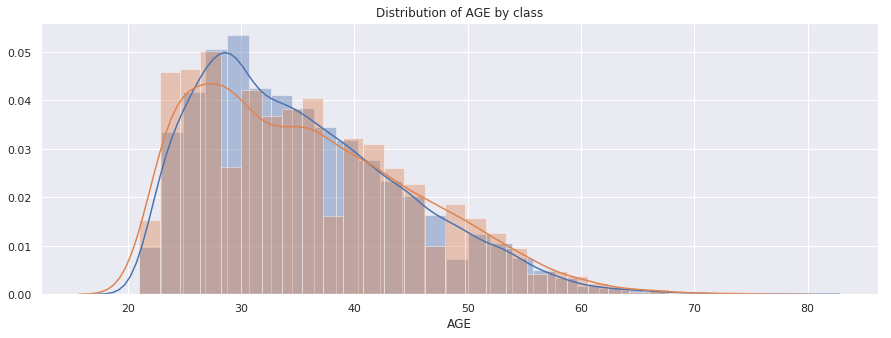

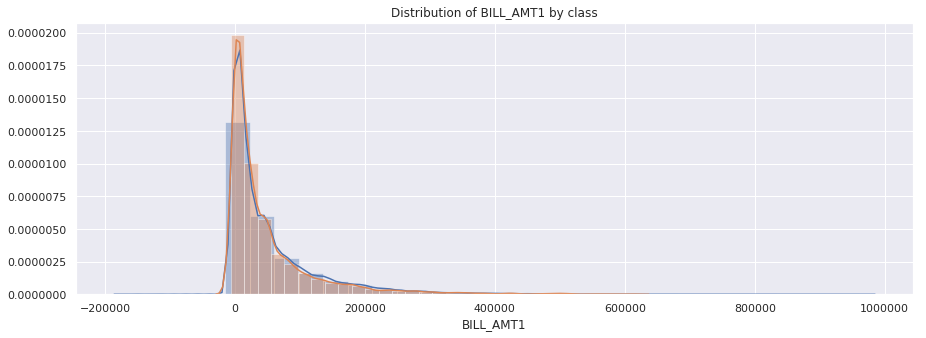

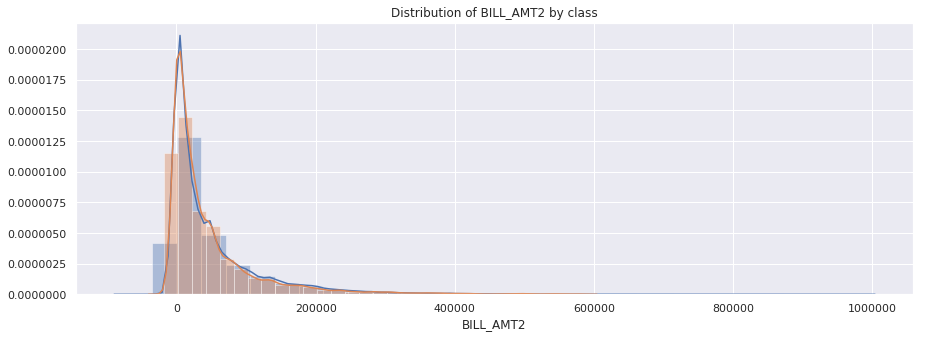

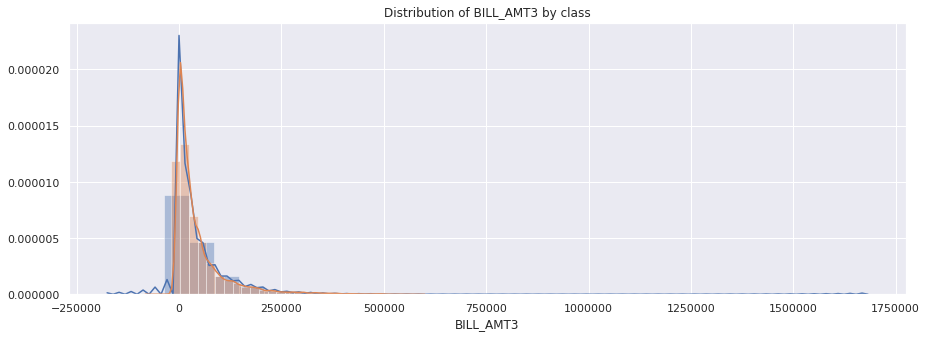

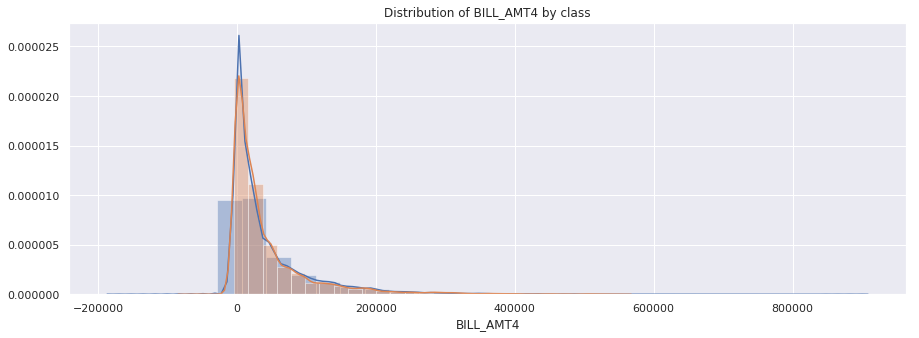

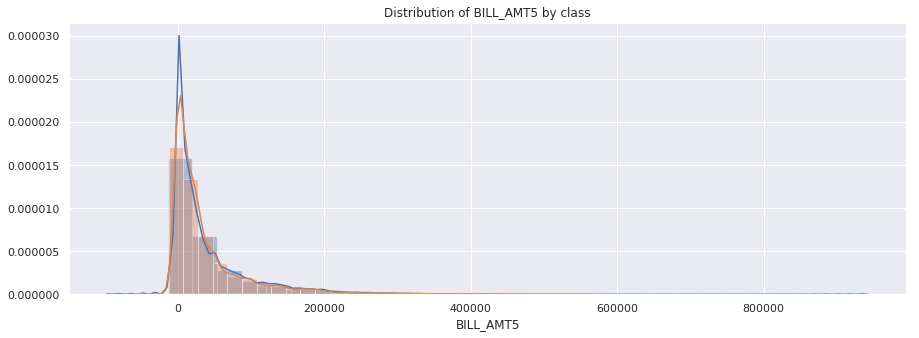

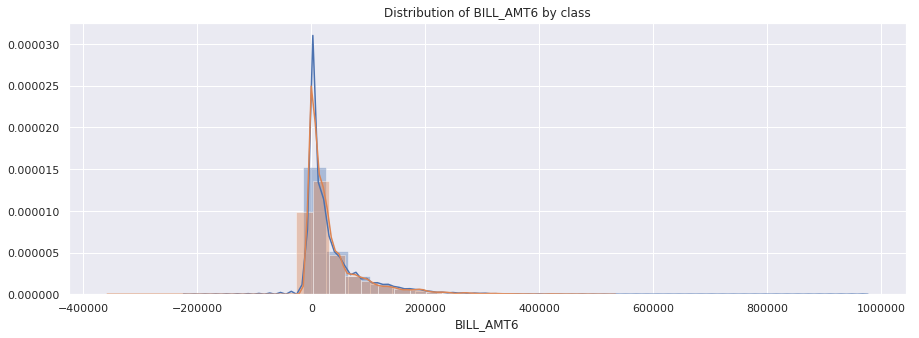

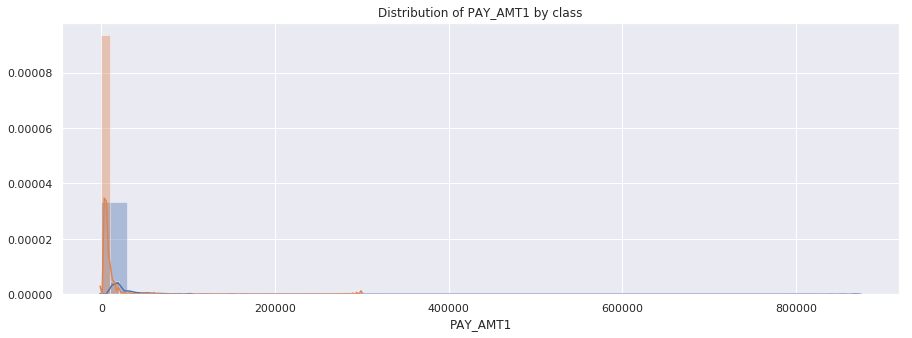

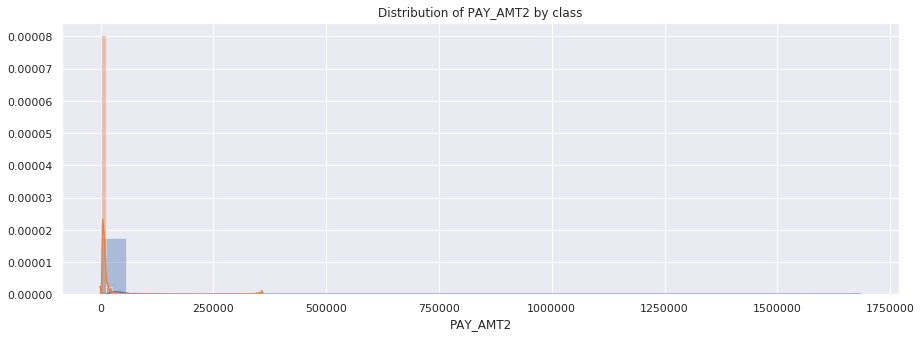

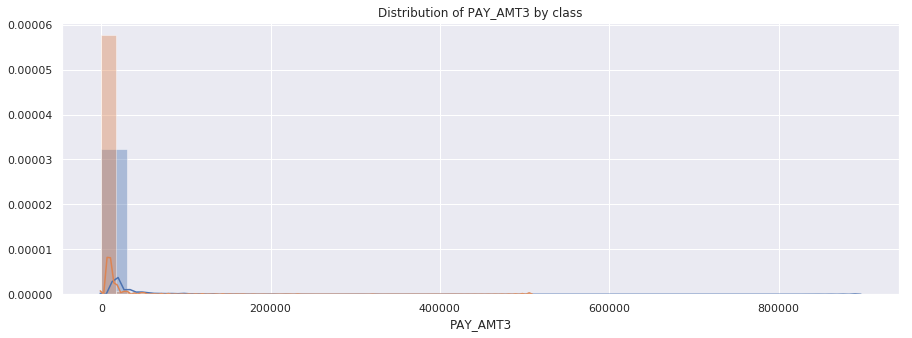

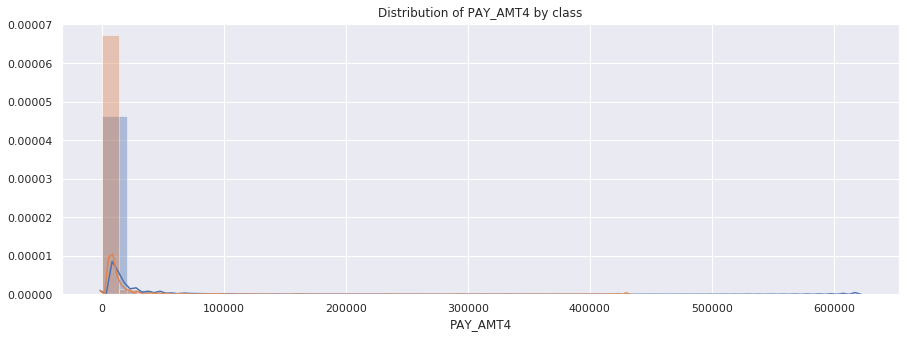

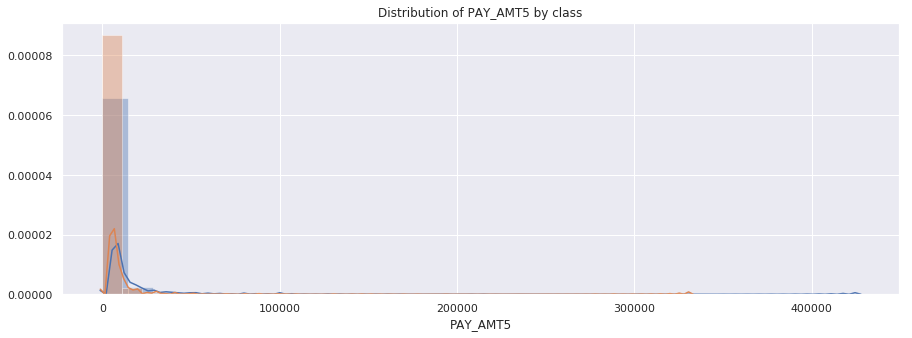

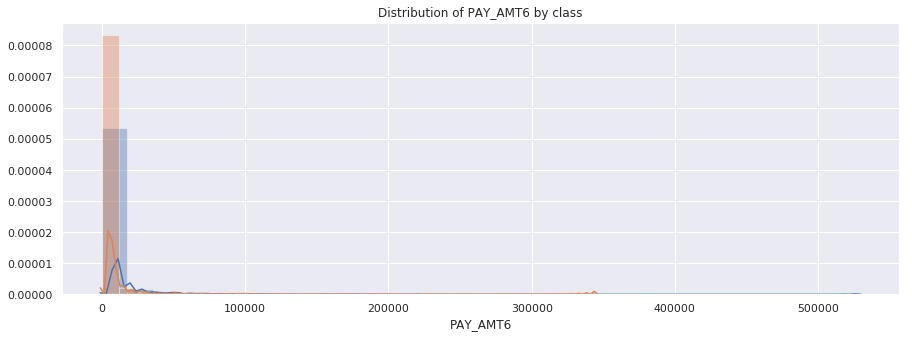

In [0]:
#@title Plotting distributions of decision variables by class

card = pd.read_csv('/gdrive/My Drive/BT2101 Group Project/card.csv', skiprows=1)

continuous = ['AGE'] + ['BILL_AMT'+i for i in '123456'] + ['PAY_AMT'+i for i in '123456']
for x in continuous:  
  plt.figure(figsize=(15,5))
  sns.distplot(card.loc[card['default payment next month']==0, x], bins=30)
  sns.distplot(card.loc[card['default payment next month']==1, x], bins=30)
  plt.title(f'Distribution of {x} by class')
  plt.show()

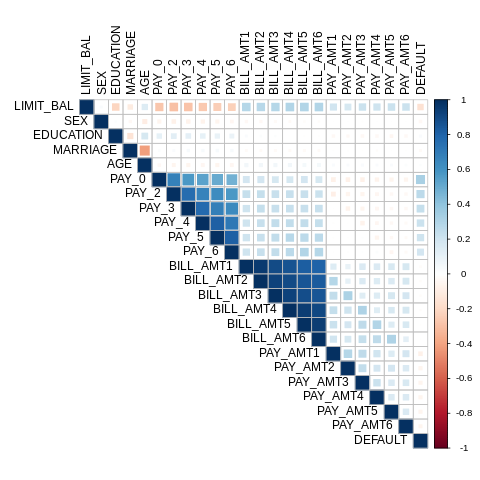

In [0]:
#@title Correlation matrix { display-mode: "form" }

%%R
install.packages("corrplot")
install.packages("Hmisc")
library(Hmisc)
library(corrplot)
corr.result <- rcorr(as.matrix(data[,2:25])) # get mutual correlation
corrplot(corr.result$r, type = "upper", method = "square", tl.col = "black")

# Data Pre-Processing (Mostly python)

### Train-test split (R)

Data was split into train and test sets following the code supplied in the assignment.

In [0]:
%%R

path <- '/gdrive/My Drive/BT2101 Group Project'
data <- read.csv(paste(path, 'data', 'card.csv', sep='/'), skip=1)

str(data)

'data.frame':	30000 obs. of  46 variables:
 $ ID                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL           : int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX_male            : int  0 0 0 0 1 1 1 0 0 1 ...
 $ EDUCATION_gradSch   : int  0 0 0 0 0 1 1 0 0 0 ...
 $ EDUCATION_university: int  1 1 1 1 1 0 0 1 0 0 ...
 $ EDUCATION_highSch   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ MARRIAGE_married    : int  1 0 0 1 1 0 0 0 1 0 ...
 $ MARRIAGE_single     : int  0 1 1 0 0 1 1 1 0 1 ...
 $ AGE                 : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0_unknown0      : int  0 0 1 1 0 1 1 1 1 0 ...
 $ PAY_0_unknown2      : int  0 0 0 0 0 0 0 0 0 1 ...
 $ PAY_0_payDuly       : int  0 1 0 0 1 0 0 0 0 0 ...
 $ PAY_0_value         : int  2 0 0 0 0 0 0 0 0 0 ...
 $ PAY_2_unknown0      : int  0 0 1 1 1 1 1 0 1 0 ...
 $ PAY_2_unknown2      : int  0 0 0 0 0 0 0 0 0 1 ...
 $ PAY_2_payDuly       : int  0 0 0 0 0 0 0 1 0 0 ...
 $ PAY_2_value         : int  2 2 0 0 

In [0]:
%%R

# Make training and testing sets
set.seed(123)
n <- length(data$DEFAULT)
index <- 1:nrow(data)
testindex <- sample(index, trunc(2 * n) / 3)
test.data <- data[testindex, ]
train.data <- data[-testindex, ]

# Make training and validation sets by stratified sampling
# valid.data <- sample_frac(group_by(train.data, DEFAULT), .2)
# train.data <- train.data[!(train.data$ID %in% valid.data$ID), ]

print(paste('shape(Xtr) = (', nrow(train.data), ',', ncol(train.data), ')'))
print(paste('shape(Xte) = (', nrow(test.data), ',', ncol(test.data), ')'))

[1] "shape(Xtr) = ( 10000 , 46 )"
[1] "shape(Xte) = ( 20000 , 46 )"


In [0]:
%%R

write.csv(train.data, paste(path, 'data', 'train.csv', sep='/'), row.names=FALSE)
write.csv(test.data, paste(path, 'data', 'test.csv', sep='/'), row.names=FALSE)

### Categorical encoding

Categorical variables were one-hot encoded, with unknown values aggregated under a dummy variable (chosen to be dropped to maintain linear independence).

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, scale

from google.colab import drive

drive.mount('/gdrive')

path = '/gdrive/My Drive/BT2101 Group Project'
df = pd.read_csv(f'{path}/data/card.csv', skiprows=1)

ID = ['ID']
continuous = ['LIMIT_BAL', 'AGE']
categories = ['SEX', 'EDUCATION', 'MARRIAGE']
paycols = ['PAY_'+i for i in '023456']
billcols = [col+i for col in ('BILL_AMT', 'PAY_AMT') for i in '123456']
target = ['default payment next month']

In [0]:
def encode(df):
  # work on a fresh copy
  cleaned = df.copy()

  # Categorical data
  cleaned['SEX_male'] = np.where(cleaned['SEX'] == 1, 1, 0)

  cleaned['EDUCATION_gradSch'] = np.where(cleaned['EDUCATION'] == 1, 1, 0)
  cleaned['EDUCATION_university'] = np.where(cleaned['EDUCATION'] == 2, 1, 0)
  cleaned['EDUCATION_highSch'] = np.where(cleaned['EDUCATION'] == 3, 1, 0)

  cleaned['MARRIAGE_married'] = np.where(cleaned['MARRIAGE'] == 1, 1, 0)
  cleaned['MARRIAGE_single'] = np.where(cleaned['MARRIAGE'] == 2, 1, 0)

  # Mixed data
  delay = [1, 2, 3, 4, 5, 6, 7, 8, 9]

  for col in paycols:
    cleaned[col+'_unknown0'] = np.where(cleaned[col] == 0, 1, 0)
    cleaned[col+'_unknown2'] = np.where(cleaned[col] == -2, 1, 0)
    cleaned[col+'_payDuly'] = np.where(cleaned[col] == -1, 1, 0)
    cleaned[col+'_value'] = cleaned[col].isin(delay) * cleaned[col]

  new_paycols = sum(([col+'_unknown0', col+'_unknown2', col+'_payDuly', col+'_value'] for col in paycols), [])

  orderedcols = [
      *ID,
      'LIMIT_BAL',
      'SEX_male', 
      'EDUCATION_gradSch', 'EDUCATION_university','EDUCATION_highSch',
      'MARRIAGE_married', 'MARRIAGE_single',
      'AGE',
      *new_paycols,
      *billcols,
      *target,
  ]

  colnames = [
      *ID,
      'LIMIT_BAL',
      'SEX_male', 
      'EDUCATION_gradSch', 'EDUCATION_university','EDUCATION_highSch',
      'MARRIAGE_married', 'MARRIAGE_single',
      'AGE',
      *new_paycols,
      *billcols,
      'DEFAULT',
  ]

  export = cleaned[orderedcols]
  export.columns = colnames

  return export

train = pd.read_csv(f'{path}/data/test.csv')
encode(train).to_csv(f'{path}/data/encoded_train.csv', index=False)

test = pd.read_csv(f'{path}/data/test.csv')
encode(train).to_csv(f'{path}/data/encoded_test.csv', index=False)

NameError: ignored

### Normalize (by train set)

Z-score normalization is applied to continuous variables in both train and test sets using mean and std from only the train set.

In [0]:
to_scale = continuous + billcols + [f'PAY_{i}_value' for i in '023456']

train = pd.read_csv(f'{path}/data/encoded_train.csv')
test = pd.read_csv(f'{path}/data/encoded_test.csv')

scaled_train = (train - train.mean()) / train.std()
scaled_test = (test - train.mean()) / train.std()

export_train = train.copy()
export_test = test.copy()

export_train[to_scale] = scaled_train[to_scale]
export_test[to_scale] = scaled_test[to_scale]

In [0]:
export_train.to_csv(f'{path}/data/card_train.csv', index=False)
export_test.to_csv(f'{path}/data/card_test.csv', index=False)

### Balancing train set

There are significantly more entries where default=1 than default=0. Undersampling is used to build a balanced train set for models that 
require it.

In [0]:
skewed = pd.read_csv(f'{path}/data/card_train.csv')

counts = skewed.groupby('DEFAULT')['DEFAULT'].count()

print(counts)

DEFAULT
0    7852
1    2148
Name: DEFAULT, dtype: int64


In [0]:
neg = skewed[skewed['DEFAULT']==0]
pos = skewed[skewed['DEFAULT']==1]

train_under = pd.concat([
    neg.sample(counts.min()),
    pos,
])

train_over = pd.concat([
    skewed,
    pos.sample(counts.max() - counts.min(), replace=True)
])

print(
    'After undersampling:',
    train_under.groupby('DEFAULT')['DEFAULT'].count(),
    '',
    'After oversampling:',
    train_over.groupby('DEFAULT')['DEFAULT'].count(),
    sep='\n',
)

After undersampling:
DEFAULT
0    2148
1    2148
Name: DEFAULT, dtype: int64

After oversampling:
DEFAULT
0    7852
1    7852
Name: DEFAULT, dtype: int64


In [0]:
# Shuffle rows
train_under.sample(len(train_under), replace=False)
train_over.sample(len(train_over), replace=False)

train_under.to_csv(f'{path}/data/card_train_undersample.csv', index=False)
train_over.to_csv(f'{path}/data/card_train_oversample.csv', index=False)

# Naive Bayes Model

In [0]:
%%R
install.packages(c('naivebayes', 'InformationValue', 'pracma'))
library(naivebayes)
library(InformationValue)
library(pracma)

path <- '/gdrive/My Drive/BT2101 Group Project'
data.original <- read.csv(paste(path, 'data', 'card_train.csv', sep='/')) %>% as_tibble()
data.balanced <- read.csv(paste(path, 'data', 'card_train_oversample.csv', sep='/')) %>% as_tibble()

## Search functions

In [0]:
%%R

# Grid search
grid.search <- function(model.func, data, param.grid, ...) {
    # Initialize result table
    n.metrics <- length(list(...))
    metrics <- data.frame(matrix(nrow=0, ncol=2*n.metrics)) # x2 for train and validation
    
    # k-fold cross validation
    k <- 10
    data <- data %>% mutate(fold=cut(seq(1,nrow(data)), breaks = k, labels = FALSE))

    # Evaluate each parameter combination
    n.params <- nrow(param.grid)
    for (i in 1:n.params) {
        
        # Temp results table
        metrics.fold <- data.frame(matrix(nrow=0, ncol=2*n.metrics))

        # k fold cross validation
        for (j in 1:k) {
            # Split train and test data
            train.data <- data %>% filter(fold!=j)
            valid.data <- data %>% filter(fold==j)

            # Fit model
            params.data <- list(data=train.data)
            params.grid <- param.grid %>% slice(i) %>% flatten()
            params <- append(params.data, params.grid)
            model.fit <- do.call(model.func, params)

            # Model predictions
            train.actual <- train.data$DEFAULT
            train.pred <- predict(model.fit, type='prob')[,2]
            
            valid.actual <- valid.data$DEFAULT
            valid.pred <- predict(model.fit, newdata = select(valid.data, -DEFAULT), type='prob')[,2]
            
            # Evaluate metrics
            train.metrics <- list(...) %>% sapply((function(f) f(train.actual, train.pred)))
            valid.metrics <- list(...) %>% sapply((function(f) f(valid.actual, valid.pred)))
            metrics.fold <- rbind(metrics.fold, append(train.metrics, valid.metrics))
        }
        
        
        names(metrics.fold) <- c(paste('training', names(list(...)), sep='.'),
                                 paste('validation', names(list(...)), sep='.'))
        metrics <- rbind(metrics, metrics.fold %>% summarise_all(mean))
    }

    # Return metrics associated with each parameter combination
    names(metrics) <- c(paste('training', names(list(...)), sep='.'), 
                        paste('validation', names(list(...)), sep='.'))
  
    return(cbind(param.grid, metrics))
}


# Re-build a model from the grid search
build.model <- function(model.func, data, params) {
    # Train on training set
    params.data <- list(data=data)
    params.grid <- params
    params <- append(params.data, params.grid)
    model.fit <- do.call(model.func, params)
    
    # return fitted model
    return(model.fit)
}

# Metrics (ypred is predicted probs)
getacc <- function(y, ypred) {
    mean(y == ifelse(ypred > 0.5, 1, 0))
}

getAUC <- function(y, ypred) {
    # lazy way to compute ROC stuff with the unfortunate side effect of plotting the ROC
    M <- plotROC(y, ypred, returnSensitivityMat = TRUE)
    x <- M[,1]
    y <- M[,2]

    W <- x[2:length(x)] - x[1:(length(x)-1)]
    H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
    
    return(W %*% H)
}

getF1 <- function(y, ypred) {
    # y = data$DEFAULT
    # y.pred = predict(model, newdata=data, type='class')
    # y.pred = predict(model, newdata=data)

    xtab <- table(factor(y, levels=c(1, 0)), 
                  factor(ypred > 0.5, levels=c(TRUE, FALSE)))
    
    precision <- xtab[1,1] / sum(xtab[,1])
    recall <- xtab[1,1] / sum(xtab[1,])

    return(2 * (precision * recall) / (precision + recall))
}

## Search parameters

In [0]:
%%R

# Default args
prior.default = list(NULL)
laplace.default = list(0)
usekernel.default = list(FALSE)
usepoisson.default = list(FALSE)

# candidate args
xtab <- table(data.original$DEFAULT)
xtab <- xtab / sum(xtab)

prior = list(xtab, NULL)
laplace <- logseq(10e-5, 10e5, n=10)
usekernel = list(TRUE, FALSE)
usepoisson = list(TRUE, FALSE)

# Naive bayes model
func = function(...) {naive_bayes(DEFAULT~., ...)}

# Minor data processing and feature selection using results from EDA
data.reduced <- data.balanced %>%
    select(LIMIT_BAL, PAY_AMT1, AGE, 
            PAY_0_value, PAY_0_payDuly, PAY_0_unknown0, PAY_0_unknown2,
            EDUCATION_gradSch, EDUCATION_university, EDUCATION_highSch, 
            MARRIAGE_married, MARRIAGE_single,
            SEX_male, DEFAULT) %>%
    mutate(DEFAULT=as.factor(DEFAULT))

## `prior`
We try supplying prior probabilities from the original dataset.

           prior laplace usekernel usepoisson training.AUC training.acc
1 0.7852, 0.2148       0     FALSE      FALSE    0.7338201    0.6889115
2           NULL       0     FALSE      FALSE    0.7339163    0.6667516
  validation.AUC validation.acc
1      0.7421213      0.6861946
2      0.7425759      0.6780438


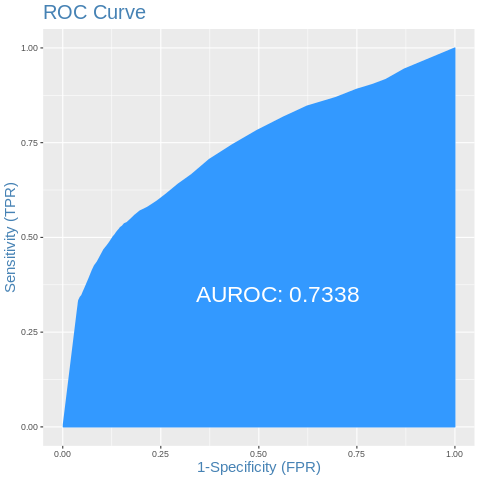

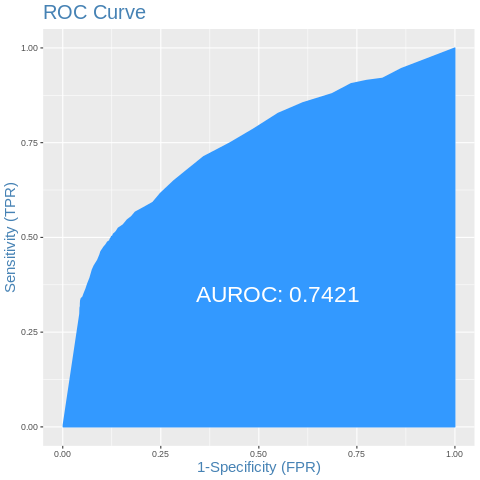

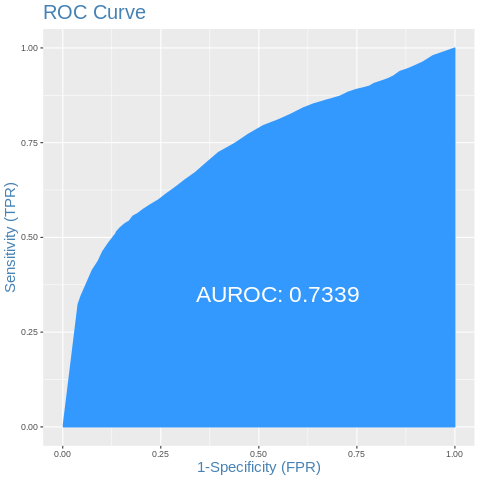

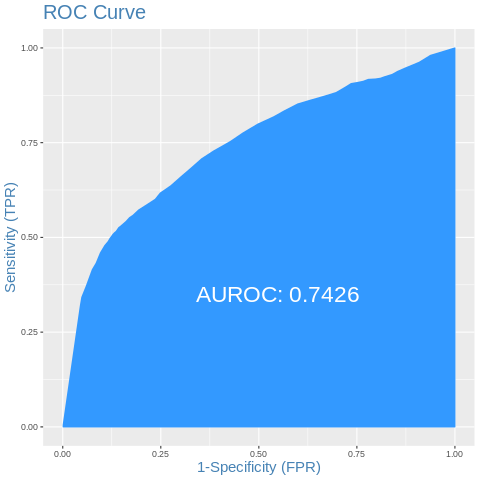

In [0]:
%%R

results <-  grid.search(
    model.func = func,
    data = data.reduced,
    param.grid = expand.grid(
        prior = prior, 
        laplace = laplace.default, 
        usekernel = usekernel.default, 
        usepoisson = usepoisson.default
    ),

    # Metrics
    AUC = getAUC, 
    acc = getacc
)

# Arrange model params by training accuracy
results %>% arrange(desc(validation.acc))

## `laplace`
We search for a good laplace value over a logarithmic scale. This can be modified to iteratively narrow the range of the search.

In [0]:
%%R

results <-  grid.search(
    model.func = func,
    data = data.reduced,
    param.grid = expand.grid(
        prior = prior.default,
        laplace = laplace, 
        usekernel = usekernel.default, 
        usepoisson = usepoisson.default
    ),

    # Metrics
    # AUC = getAUC, 
    acc = getacc,
    f1 = getF1
)

# Arrange model params by training accuracy
results %>% arrange(desc(validation.f1))

   prior      laplace usekernel usepoisson training.acc training.f1 validation.acc validation.f1
1   NULL 1.000000e-04     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
2   NULL 1.291550e-03     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
3   NULL 1.668101e-02     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
4   NULL 2.154435e-01     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
5   NULL 2.782559e+00     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
6   NULL 3.593814e+01     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
7   NULL 4.641589e+02     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
8   NULL 5.994843e+03     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
9   NULL 7.742637e+04     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
10  NULL 1.000000e+06     FALS

## `usekernel`

Most of our variables are not normally distributed so we expect the latter to perform better.

In [0]:
%%R

results <-  grid.search(
    model.func = func,
    data = data.reduced,
    param.grid = expand.grid(
        prior = prior.default,
        laplace = laplace.default, 
        usekernel = usekernel, 
        usepoisson = usepoisson.default
    ),

    # Metrics
    AUC = getAUC, 
    acc = getacc
)

# Arrange model params by training accuracy
results %>% arrange(desc(validation.acc))

params.data <- list(data=train.data %>% mutate(DEFAULT=as.factor(DEFAULT)))
        params.grid <- param.grid %>% slice(i) %>% flatten()
        params <- append(params.data, params.grid)
        model.fit <- do.call(model.func, params)


Error in eval(lhs, parent, parent) : object 'train.data' not found


## `usepoisson`

  prior laplace usekernel usepoisson training.AUC training.acc validation.AUC
1  NULL       0     FALSE       TRUE    0.7417351    0.6715911      0.7494077
2  NULL       0     FALSE      FALSE    0.7339163    0.6667516      0.7425759
  validation.acc
1      0.6818645
2      0.6780438


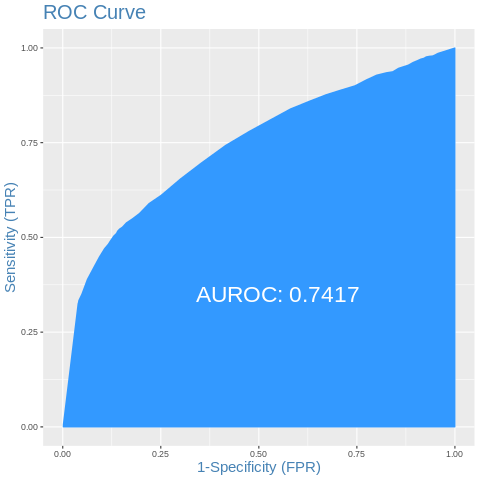

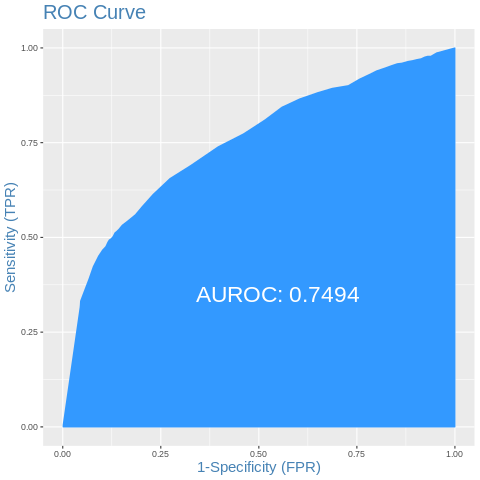

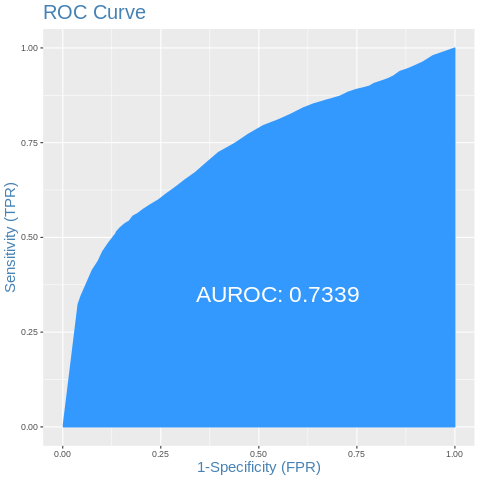

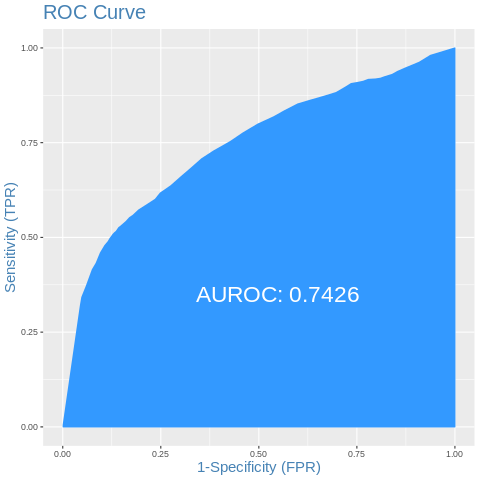

In [0]:
%%R

results <-  grid.search(
    model.func = func,
    data = data.reduced,
    param.grid = expand.grid(
        prior = prior.default,
        laplace = laplace.default, 
        usekernel = usekernel.default, 
        usepoisson = usepoisson
    ),

    # Metrics
    AUC = getAUC, 
    acc = getacc
)

# Arrange model params by training accuracy
results %>% arrange(desc(validation.acc))

## Grid search for best parameters

In [0]:
%%R

results <- grid.search(
    model.func = func,
    data = data.reduced,
    param.grid = expand.grid(
        prior = prior,
        laplace = laplace, 
        usekernel = usekernel, 
        usepoisson = usepoisson
    ),

    # Metrics
    acc = getacc,
    f1 = getF1
)

### Validation accuracy

In [0]:
%%R

acc.top10 <- results %>%
  arrange(desc(validation.acc)) %>%
  head(10)

options(width=150)
print('best params by validation accuracy')
print.data.frame(acc.top10)

[1] "best params by validation accuracy"
            prior      laplace usekernel usepoisson training.acc training.f1 validation.acc validation.f1
1  0.7852, 0.2148 464.15888336     FALSE       TRUE    0.8317696   0.8123116      0.8321491     0.6313583
2  0.7852, 0.2148  35.93813664     FALSE       TRUE    0.8293286   0.8093434      0.8298568     0.6300309
3  0.7852, 0.2148   0.00010000     FALSE       TRUE    0.8290173   0.8089415      0.8289652     0.6292263
4  0.7852, 0.2148   0.00129155     FALSE       TRUE    0.8290173   0.8089415      0.8289652     0.6292263
5  0.7852, 0.2148   0.01668101     FALSE       TRUE    0.8290173   0.8089415      0.8289652     0.6292263
6  0.7852, 0.2148   0.21544347     FALSE       TRUE    0.8290173   0.8089415      0.8289652     0.6292263
7  0.7852, 0.2148   2.78255940     FALSE       TRUE    0.8290456   0.8089886      0.8289652     0.6292263
8  0.7852, 0.2148   0.00010000     FALSE      FALSE    0.8298736   0.8132252      0.8234242     0.6360527
9  0.


===================================================================== Naive Bayes ===================================================================== 
 
- Call: naive_bayes.formula(formula = DEFAULT ~ ., data = structure(list(     LIMIT_BAL = c(-1.12889809137074, -0.590497511805436, -0.898154985842753,      -0.513583143296106, 0.717046752853164, 2.17841975453042,      -0.590497511805436, -0.898154985842753, 2.56299159707707,      2.56299159707707, 0.870875489871823, -0.129011300749459,      1.10161859539981, 0.255560541797188, 2.56299159707707, -0.282840037768118,      -1.20581245988007, -1.12889809137074, 0.947789858381152,      1.02470422689048, 0.563218015834505, 1.48619043794646, -0.821240617333424,      1.79384791198378, -0.898154985842753, -0.0520969322401298,      -0.282840037768118, -1.12889809137074, 0.870875489871823,      1.48619043794646, 1.25544733241847, 0.563218015834505, -0.667411880314765,      0.563218015834505, -1.05198372286141, 1.94767664900243, 0.33247491030651

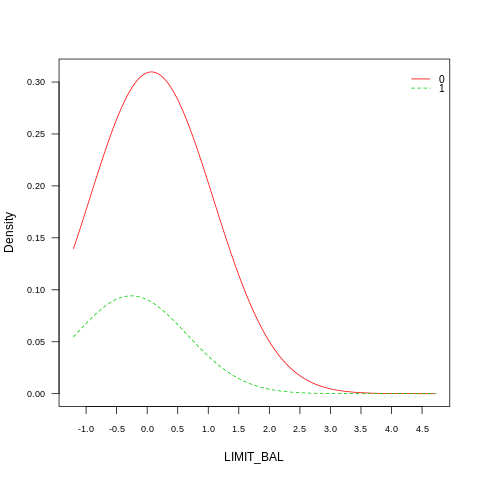

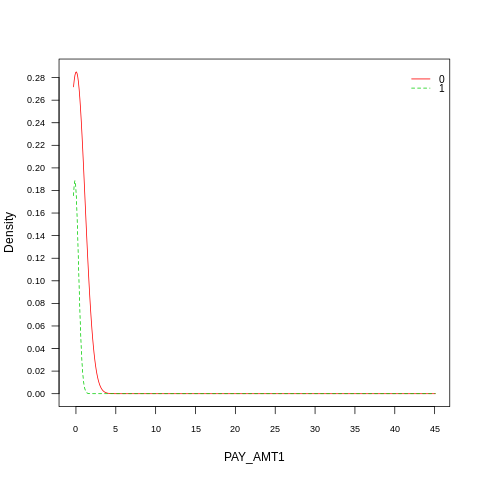

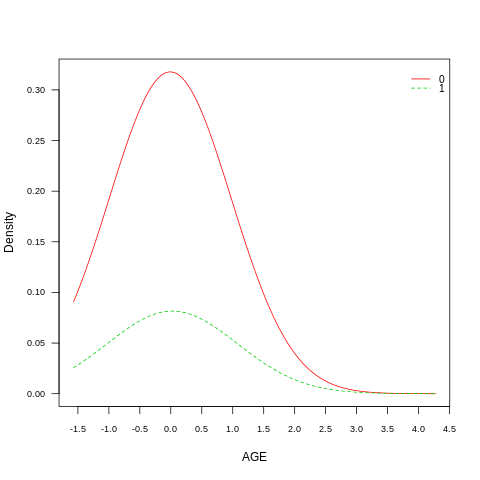

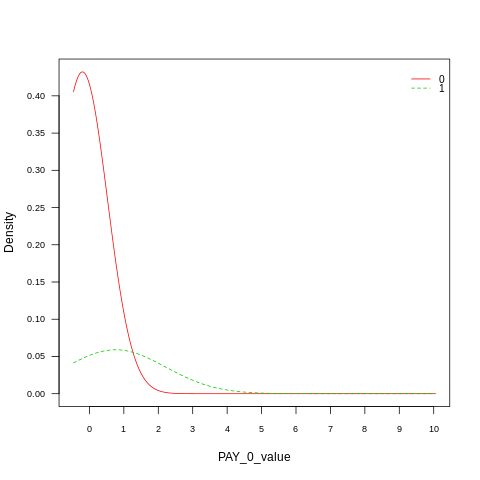

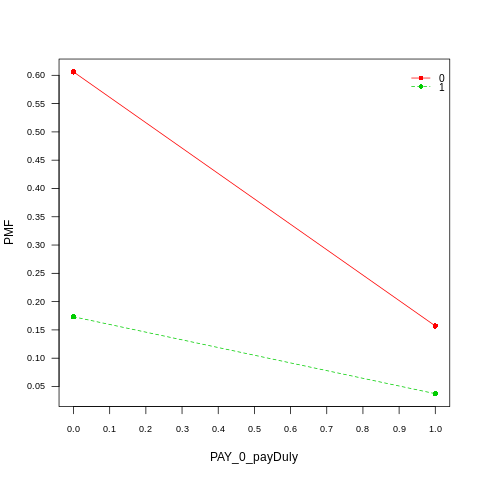

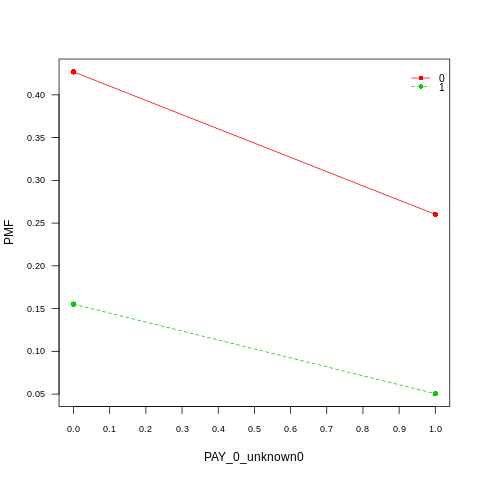

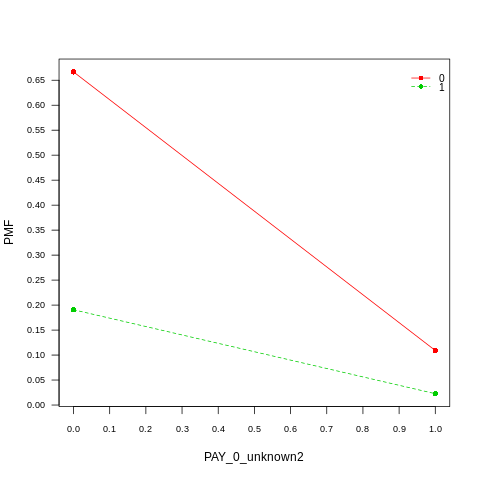

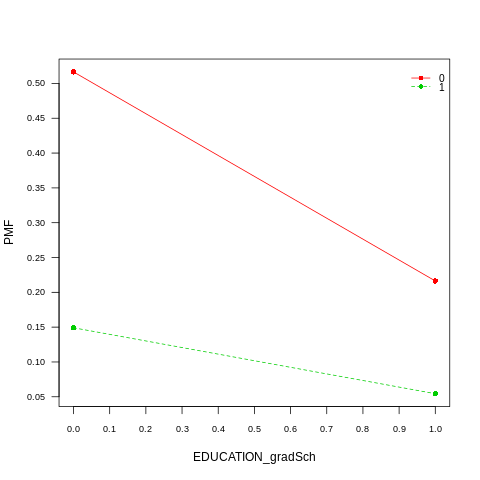

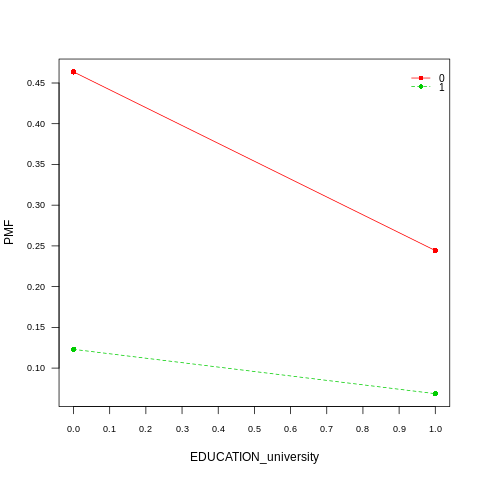

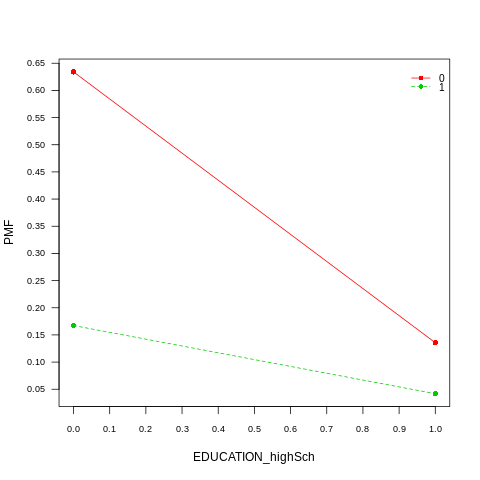

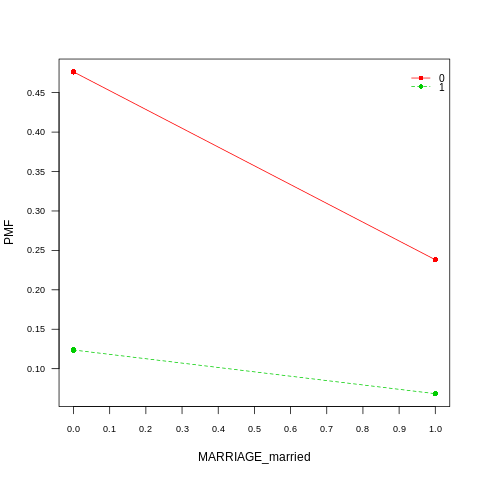

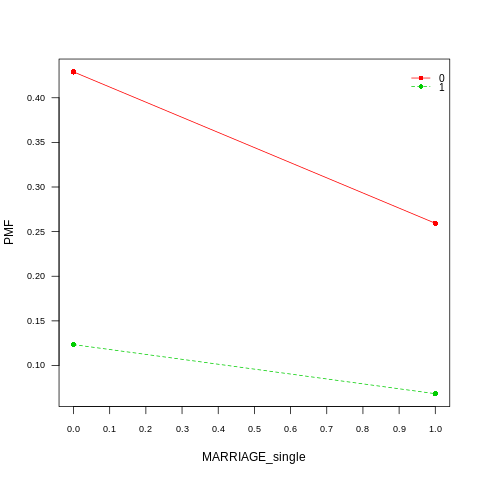

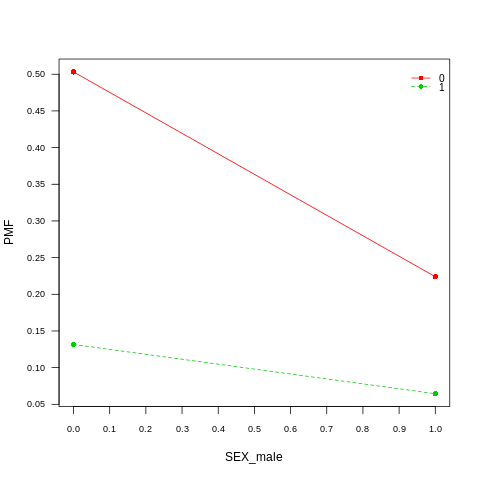

In [0]:
%%R

acc.topParams <- acc.top10 %>% slice(1) %>% flatten()
acc.topModel <- build.model(func, data.reduced, acc.topParams)

summary(acc.topModel)
plot(acc.topModel)

In [0]:
%%R

file = paste(path, 'models', 'model_nb_acc.rda', sep='/')
saveRDS(acc.topModel, file = file)

### Validation F1 score

In [0]:
%%R

f1.top10 <- results %>%
  arrange(desc(validation.f1)) %>%
  head(10)

options(width=150)
print('best params by validation F1 score')
print(f1.top10)

[1] "best params by validation F1 score"
   prior      laplace usekernel usepoisson training.acc training.f1 validation.acc validation.f1
1   NULL 1.000000e-04     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
2   NULL 1.291550e-03     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
3   NULL 1.668101e-02     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
4   NULL 2.154435e-01     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
5   NULL 2.782559e+00     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
6   NULL 3.593814e+01     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
7   NULL 4.641589e+02     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
8   NULL 5.994843e+03     FALSE      FALSE    0.8169115    0.818811      0.7951425     0.6561797
9   NULL 7.742637e+04     FALSE      FALSE    0.8169115    0.818811      0.7951425    


===================================================================== Naive Bayes ===================================================================== 
 
- Call: naive_bayes.formula(formula = DEFAULT ~ ., data = structure(list(     LIMIT_BAL = c(-1.12889809137074, -0.590497511805436, -0.898154985842753,      -0.513583143296106, 0.717046752853164, 2.17841975453042,      -0.590497511805436, -0.898154985842753, 2.56299159707707,      2.56299159707707, 0.870875489871823, -0.129011300749459,      1.10161859539981, 0.255560541797188, 2.56299159707707, -0.282840037768118,      -1.20581245988007, -1.12889809137074, 0.947789858381152,      1.02470422689048, 0.563218015834505, 1.48619043794646, -0.821240617333424,      1.79384791198378, -0.898154985842753, -0.0520969322401298,      -0.282840037768118, -1.12889809137074, 0.870875489871823,      1.48619043794646, 1.25544733241847, 0.563218015834505, -0.667411880314765,      0.563218015834505, -1.05198372286141, 1.94767664900243, 0.33247491030651

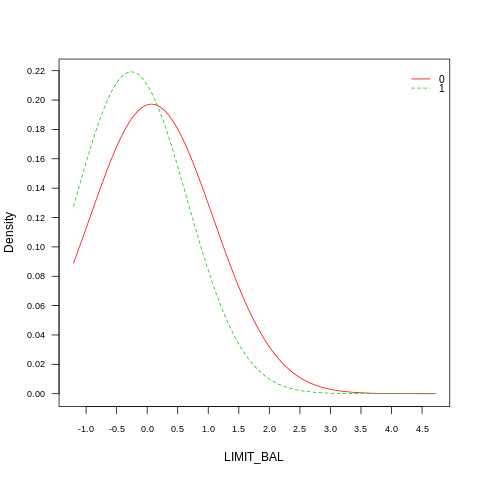

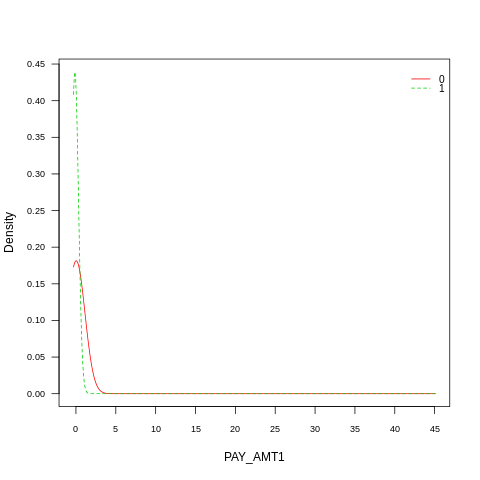

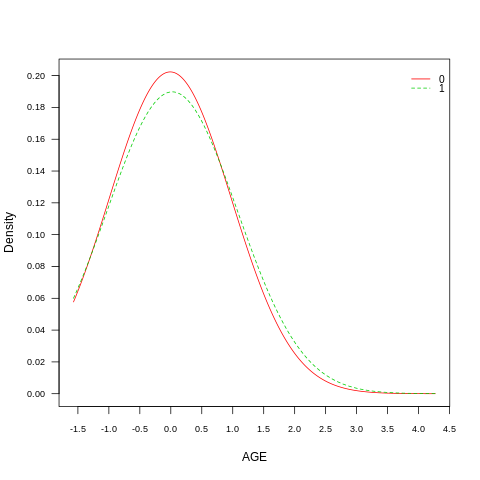

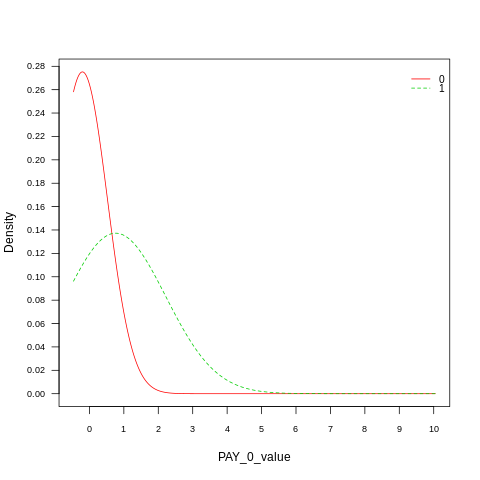

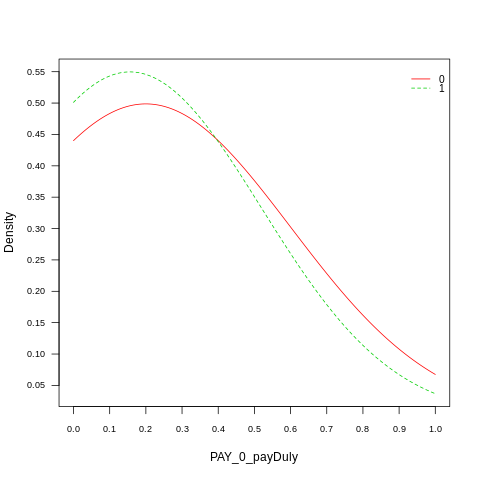

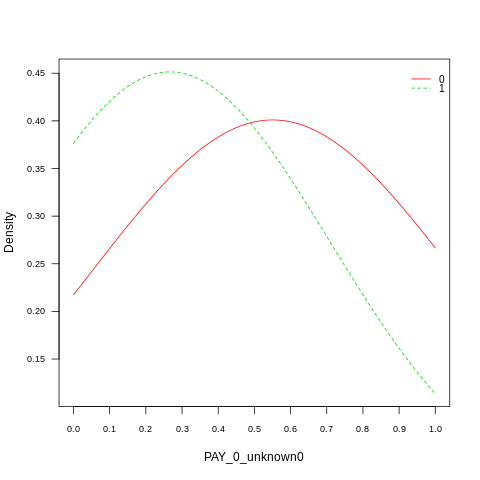

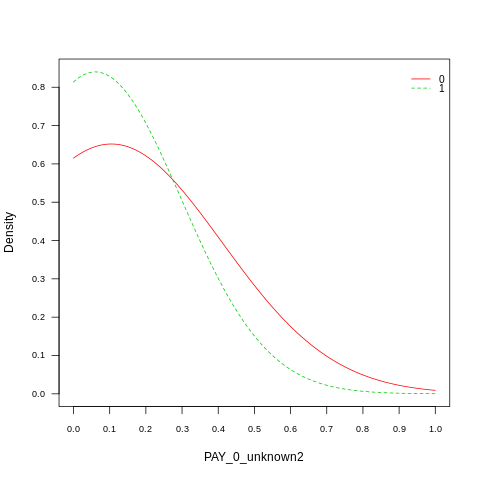

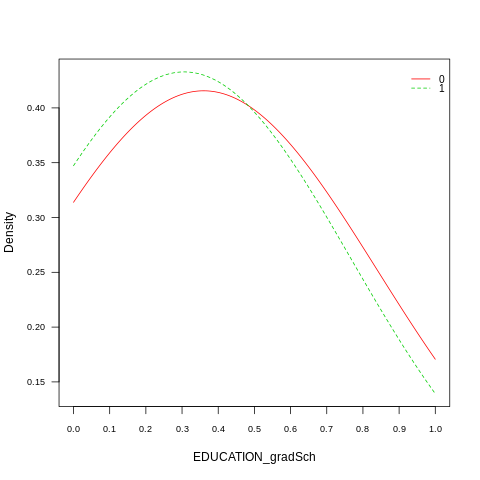

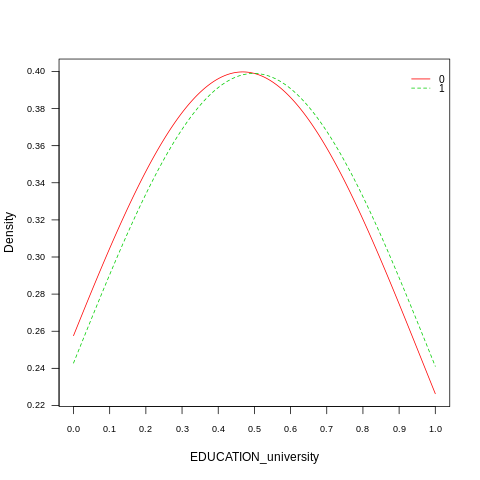

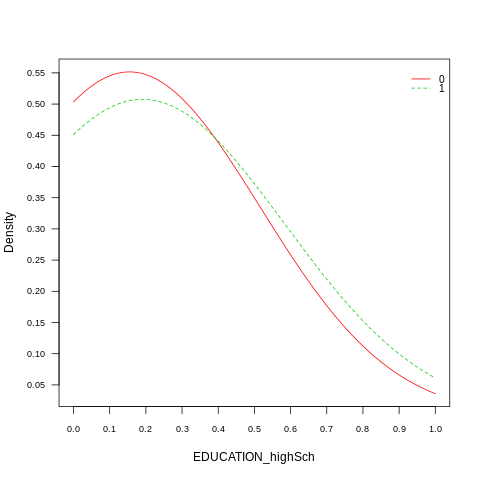

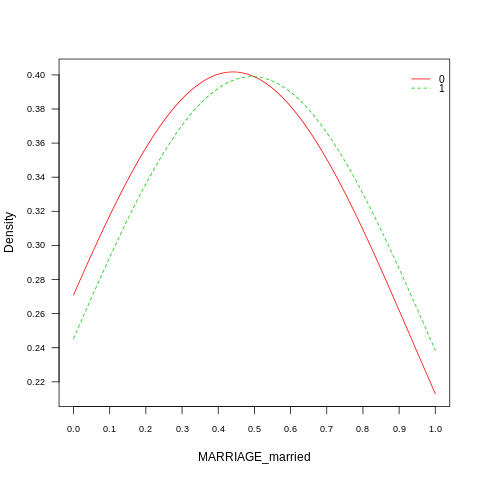

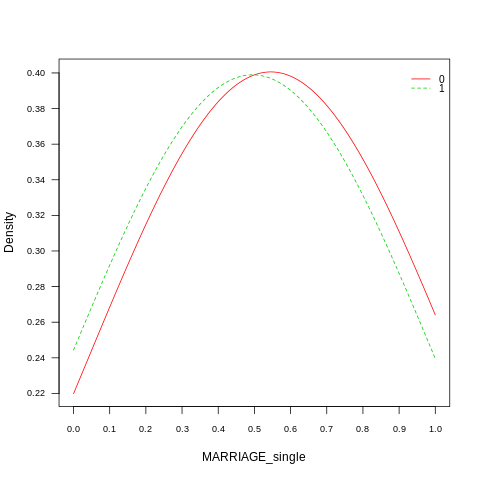

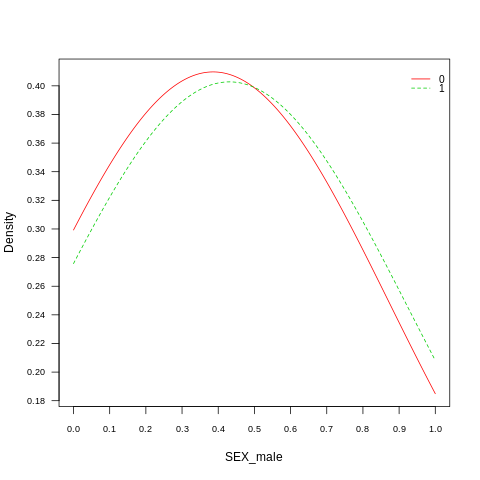

In [0]:
%%R

f1.topParams <- f1.top10 %>% slice(1) %>% flatten()
f1.topModel <- build.model(func, data.reduced, f1.topParams)

summary(f1.topModel)
plot(f1.topModel)

In [0]:
%%R

file = paste(path, 'models', 'model_nb_f1.rda', sep='/')
saveRDS(f1.topModel, file = file)

In [0]:
%%R

print('Means across all models')
results %>% 
    select(training.acc, training.f1, validation.acc, validation.f1) %>%
    replace_na(list(validation.f1=0, training.f1=0)) %>%
    summarise_all(mean)

[1] "Means across all models"
  training.acc training.f1 validation.acc validation.f1
1    0.7918226   0.7276484      0.7241994     0.3496034


# Neural Network Model

In [0]:
# F1 Score
F1 <- function(model, data) {
  y = data$DEFAULT
  y.pred = predict(model, newdata=data, type='class')
  
  xtab <- table(factor(y, levels=c(1, 0)), 
                factor(y.pred, levels=c(1, 0)))
  
  precision <- xtab[1,1] / sum(xtab[,1])
  recall <- xtab[1,1] / sum(xtab[1,])
  
  return(2 * (precision * recall) / (precision + recall))
}

#### Neural Network ####
library(nnet)

# Set formula
formula <- as.formula(paste("train.class ~ ", paste(labels[2:45], collapse = "+")))
formula

# Function to compute RMSE
RMSE.calc <- function(model, val.data) {
  mr <- model$residuals
  rmse_squared = 0
  n <- nrow(val.data)
  for (i in 1:n) {
    rmse_squared = rmse_squared + (mr[i, 1])**2
  }
  rmse_squared = rmse_squared / (n - 1)
  rmse = sqrt(rmse_squared)
  rmse
}

# Load train and test data
initial.train.data <- read.table("card_train_oversample.csv", header = TRUE, sep = ",")
labels <- names(initial.train.data)

# Create 10 equally size folds
folds <- cut(seq(1,nrow(initial.train.data)), breaks = 10, labels = FALSE)

# Test for different number of hidden layers (size)
results.size <- data.frame(Size = numeric(), RMSE = numeric(), F1 = numeric())
size <- 1
while (size <= 21) {
  # Initialise RMSE and F1
  rmse <- 0
  f1 <- 0
  
  # Perform 10 fold cross validation
  for (i in 1:10) {
    # Segment data by fold using the which() function
    val.indexes <- which(folds == i, arr.ind = TRUE)
    
    # Split train and test data
    val.data <- initial.train.data[val.indexes, ]
    train.data <- initial.train.data[-val.indexes, ]
    
    train.class <- train.data[, 46]
    
    # Set seed and train model
    set.seed(123)
    model.nn <- nnet(formula, data = train.data, size = size, maxit = 1000, entropy = TRUE)
    
    # Calculate RMSE and Accuracy 
    rmse <- rmse + RMSE.calc(model.nn, val.data)
    f1 <- f1 + F1(model.nn, val.data)
  }
  
  # Get average RMSE and Accuracy
  rmse <- rmse / 10
  f1 <- f1 / 10
  
  # Add to results
  results.size <- rbind(results.size, c(size, rmse, f1))
  
  size = size + 5
}

# View results
names(results.size) <- c("Size", "RMSE", "F1")
results.size

# Test for different decays
# Set default size = 10
results.decay <- data.frame(Decay = numeric(), RMSE = numeric(), F1 = numeric())
decay <- 0
while (decay <= 1) {
  # Initialise RMSE and F1
  rmse <- 0
  f1 <- 0
  
  # Perform 10 fold cross validation
  for (i in 1:10) {
    # Segment data by fold using the which() function
    val.indexes <- which(folds == i, arr.ind = TRUE)
    
    # Split train and test data
    val.data <- initial.train.data[val.indexes, ]
    train.data <- initial.train.data[-val.indexes, ]
    
    train.class <- train.data[, 46]
    
    # Set seed and train model
    set.seed(123)
    model.nn <- nnet(formula, data = train.data, size = 10, maxit = 1000, decay = decay, entropy = TRUE)
    
    # Calculate RMSE and Accuracy 
    rmse <- rmse + RMSE.calc(model.nn, val.data)
    f1 <- f1 + F1(model.nn, val.data)
  }
  
  # Get average RMSE and Accuracy
  rmse <- rmse / 10
  f1 <- f1 / 10
  
  # Add to results
  results.decay <- rbind(results.decay, c(decay, rmse, f1))
  
  decay = decay + 0.2
}

# View results
names(results.decay) <- c("Decay", "RMSE", "F1")
results.decay

# Plot the results
ggplot(results.decay, aes(x = Decay, y = Value)) + 
  geom_line(aes(y = RMSE), color = "darkred") + 
  geom_line(aes(y = Accuracy), color="steelblue", linetype="twodash")

# Grid Search
results.gs <- data.frame(Size = numeric(), Decay = numeric(), F1 = numeric())

# Define a named list of parameter values
# Intervals for decay were decreased from 0.1 during the testing phase to 0.025 increments to more closely
# tune the decay.
gs <- list(size = c(16, 17, 18, 19, 20, 21),
           decay = c(0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2)) %>% 
  cross_df() # Convert to data frame grid

for (i in 1:nrow(gs)) {
  i.size <- gs$size[i]
  i.decay <- gs$decay[i]
  
  # Initialise F1 score
  f1 <- 0
  
  # Perform 10 fold cross validation
  for (i in 1:10) {
    # Segment data by fold using the which() function
    val.indexes <- which(folds == i, arr.ind = TRUE)
    
    # Split train and test data
    val.data <- initial.train.data[val.indexes, ]
    train.data <- initial.train.data[-val.indexes, ]
    
    train.class <- train.data[, 46]
    
    # Set seed and train model
    set.seed(123)
    model.nn <- nnet(formula, data = train.data, size = i.size, maxit = 1000, decay = i.decay, entropy = TRUE)
    
    # Calculate F1
    f1 <- f1 + F1(model.nn, val.data)
  }
  
  f1 <- f1 / 10
  
  # Add to results
  results.gs <- rbind(results.gs, c(i.size, i.decay, f1))
}

# View results
names(results.gs) <- c("Size", "Decay", "F1")
results.gs <- results.gs[order(-results.gs$F1),]
head(results.gs)


# Train the finalised model on the full train dataset 
# (size = 20, decay = 0, entropy = TRUE, maxit = 1000)
set.seed(123)
train.class <- initial.train.data$DEFAULT
model.nn <- nnet(formula, data = initial.train.data, size = 20, decay = 0, maxit = 1000, entropy = TRUE)

## Save the model (for future reference)
saveRDS(model.nn, file = "model_nn.rda")


# SVM

In [0]:
u# Remove ID columns
bal.d <- balanced %>% select(-c(ID))

cvFunction <- function(x) {
  training_fold <- bal.d[-x, ]
  test_fold <- bal.d[x, ]
  y_pred <- predict(classifier, newdata = test_fold %>% select(-c(DEFAULT))) # make prediction
  cm <- table(test_fold$DEFAULT, y_pred)  # confusion matrix
  accuracy <- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  precision <- cm[1,1] / (cm[1,1] + cm[2,1])
  recall <- cm[2,2] / (cm[2,2] + cm[2,1])
  f1score <- (2 * precision * recall) / (precision + recall)
  return(list("accuracy" = accuracy, "f1" = f1score))
}

# Build linear kernel
svm.u.linear <- svm(
  DEFAULT ~.,
  data = bal.d,
  type = "C-classification",
  kernel = "linear"
)

# Build radial basis kernel
svm.u.rb <- svm(
  DEFAULT ~.,
  data = bal.d,
  type = "C-classification",
  kernel = "radial"
)

# Build polynomial kernel
svm.u.poly <- svm(
  DEFAULT ~.,
  data = bal.d,
  type = "C-classification",
  kernel = "polynomial"
)

# Build sigmoid kernel
svm.u.sig <- svm(
  DEFAULT ~.,
  data = bal.d,
  type = "C-classification",
  kernel = "sigmoid"
)

print(svm.u.linear)
print(svm.u.rb)
print(svm.u.poly)
print(svm.u.sig)

# run 10-fold cross validation to calculate accuracies and F1 scores
folds <- createFolds(bal.d$DEFAULT, k = 10)

classifier <- svm.u.linear
cv.lin <- lapply(folds, cvFunction)
classifier <- svm.u.rb
cv.rb <- lapply(folds, cvFunction)
classifier <- svm.u.poly
cv.poly <- lapply(folds, cvFunction)
classifier <- svm.u.sig
cv.sig <- lapply(folds, cvFunction)

# combine all results into a table
getMean <- function(res) { # loop through list (e.g. cv.lin) to get mean accuracy and f1 scores
  acc.mean <- 0
  f1.mean <- 0
  for (i in res) {
    acc.mean <- acc.mean + i$accuracy
    f1.mean <- f1.mean + i$f1
  }
  k <- length(res)
  return(data.frame("accuracy" = acc.mean/k, "f1" = f1.mean/k))
}

res.default <- rbind(getMean(cv.lin), getMean(cv.rb), getMean(cv.poly), getMean(cv.sig))
row.names(res.default) <- c("linear", "radial", "polynomial", "sigmoid")

SyntaxError: ignored

# Model evaluation

In [0]:
%%R
install.packages(c('randomForest', 'rpart', 'naivebayes', 'nnet', 'e1071'))

library(randomForest)
library(rpart)
library(naivebayes)
library(nnet)
library(e1071)

evaluate.models <- function(models, data, metrics) {
    result <- data.frame(matrix(nrow=0, ncol=length(metrics)))
    
    for (model.name in names(models)) {
        model <- models[[model.name]]
        model.metrics <- metrics %>% sapply((function(f) f(model, data)))
        result <- rbind(result, model.metrics)
    }

    result <- cbind(names(models), result)
    names(result) <- append('model', names(metrics))
    return(result)
}

## Naive bayes
The interface to the naive bayes model is slightly different from the other models and requires slightly different code.

In [0]:
%%R

# Evaluation code
acc <- function(model, data) {
    y = data$DEFAULT
    y.pred = predict(model, newdata=data, type='class')
    # y.pred = predict(model, newdata=data)

    return(mean(y == y.pred))
}

AUC <- function(model, data) {
    y = data$DEFAULT
    y.pred = predict(model, newdata=data, type='prob')[,2]
    
    M <- plotROC(y, y.pred, returnSensitivityMat = TRUE)
    x <- M[,1]
    y <- M[,2]

    W <- x[2:length(x)] - x[1:(length(x)-1)]
    H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
    
    return(W %*% H)
}

F1 <- function(model, data) {
    y = data$DEFAULT
    y.pred = predict(model, newdata=data, type='class')
    # y.pred = predict(model, newdata=data)

    xtab <- table(factor(y, levels=c(1, 0)), 
                  factor(y.pred, levels=c(1, 0)))
    
    precision <- xtab[1,1] / sum(xtab[,1])
    recall <- xtab[1,1] / sum(xtab[1,])

    return(2 * (precision * recall) / (precision + recall))
}

gain <- function(model, data) {
  y = data$DEFAULT
  y.pred = predict(model, data, type = 'prob')[,2]
  
  # Combine the actual and pred
  df <- as.data.frame(cbind(y, y.pred))
  names(df) <- c("actual", "pred")
  
  # Order the prediction scores in descending order
  df <- df[order(-df$pred),]
  
  # Split into deciles
  df <- df %>% mutate(quantile = ntile(pred, 10))
  
  # Get total no. of positive instances
  total.positive = nrow(data[data$DEFAULT == 1,])
  
  # Calculate gain
  df.gains <- data.frame(Percentile = numeric(), Gain = numeric())
  df.gains <- rbind(df.gains, c(0, 0))
  perc = 0.1
  for (i in 1:10) {
    n <- sum(df[df$quantile == (11-i),]$actual) # number of positive instances
    g <- n / total.positive
    df.gains <- rbind(df.gains, c(perc, g))
    perc <- perc + 0.1
  }
  names(df.gains) <- c("Percentile", "Gain")
  
  # Calculate cumulative gain
  df.gains$CumGain <- cumsum(df.gains$Gain)
  
  # Calculate and return area under cumulative gain chart
  x <- df.gains$Percentile
  y <- df.gains$CumGain
  
  W <- x[2:length(x)] - x[1:(length(x)-1)]
  H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
  
  # Plot graph
  plot(df.gains$Percentile,df.gains$CumGain,type="l",xlab="Percentile",ylab="Gain", main = "Cumulative Gain Chart")
  
  return(W %*% H)
}

lift <- function(model, data) {
  y = data$DEFAULT
  y.pred = predict(model, data, type = 'prob')[,2]
  
  # Combine the actual and pred
  df <- as.data.frame(cbind(y, y.pred))
  names(df) <- c("actual", "pred")
  
  # Order the prediction scores in descending order
  df <- df[order(-df$pred),]
  
  # Split into deciles
  df <- df %>% mutate(quantile = ntile(pred, 10))
  
  # Get total no. of positive instances
  perc.positive = nrow(data[data$DEFAULT == 1,]) / nrow(data)
  
  # Calculate lift
  df.lift <- data.frame(Percentile = numeric(), Lift = numeric())
  perc = 0.1
  for (i in 1:10) {
    n <- sum(df[df$quantile == (11-i),]$actual) # number of positive instances
    p <- n / nrow(df[df$quantile == (11-i),])
    l <- p / perc.positive
    df.lift <- rbind(df.lift, c(perc, l))
    perc <- perc + 0.1
  }
  names(df.lift) <- c("Percentile", "Lift")
  
  # Calculate cumulative gain
  df.lift$CumLift <- cumsum(df.lift$Lift)
  
  # Calculate and return area under cumulative gain chart
  x <- df.lift$Percentile
  y <- df.lift$Lift
  
  W <- x[2:length(x)] - x[1:(length(x)-1)]
  H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
  
  # Plot graph
  plot(df.lift$Percentile, df.lift$Lift,type="l",xlab="Percentile",ylab="Lift", main = "Lift Chart")
  
  return(W %*% H)
}

evaluate.models <- function(models, data, metrics) {
    result <- data.frame(matrix(nrow=0, ncol=length(metrics)))
    
    for (model.name in names(models)) {
        model <- models[[model.name]]
        model.metrics <- metrics %>% sapply((function(f) f(model, data)))
        result <- rbind(result, model.metrics)
    }

    result <- cbind(names(models), result)
    names(result) <- append('model', names(metrics))
    return(result)
}

            model accuracy        f1     AUROC      lift      gain
1 naive.bayes.acc  0.79225 0.5108888 0.7441439 0.8247549 0.6879011
2  naive.bayes.f1  0.68100 0.4798630 0.7369171 0.8200758 0.6825312
3 naive.bayes.auc  0.77415 0.5141443 0.7471100 0.8386809 0.6886364


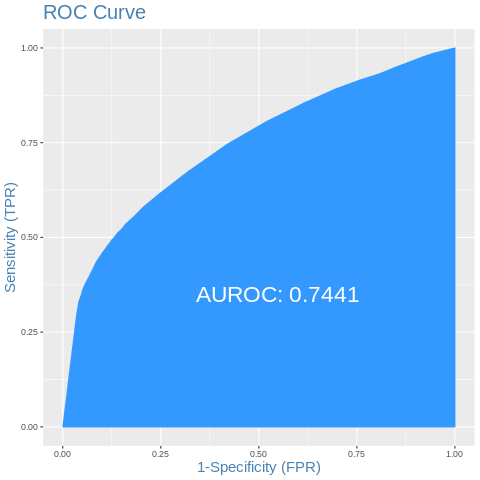

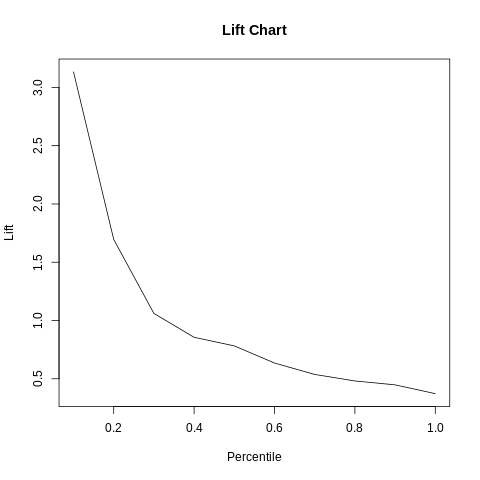

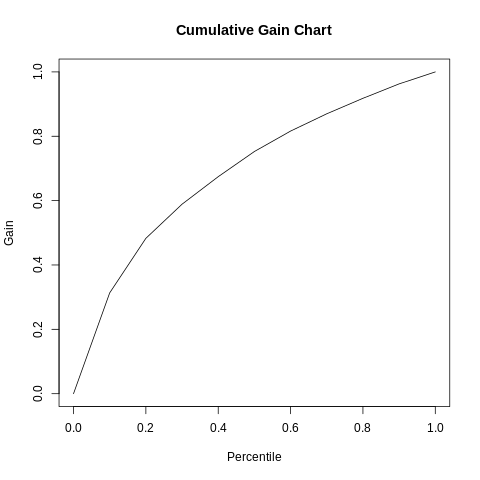

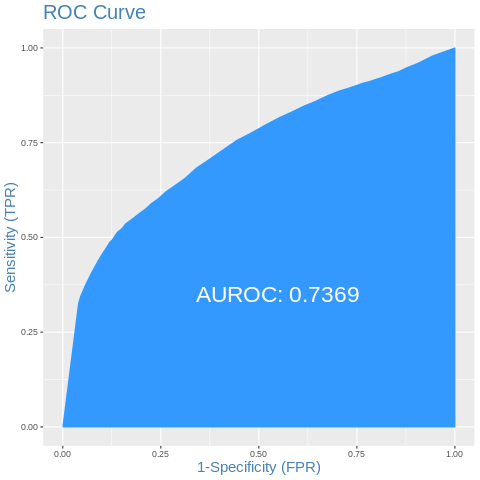

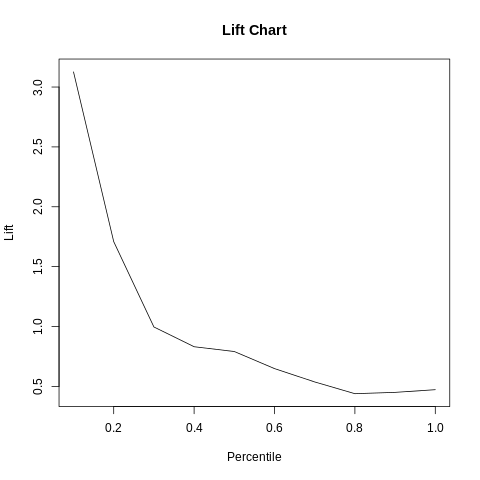

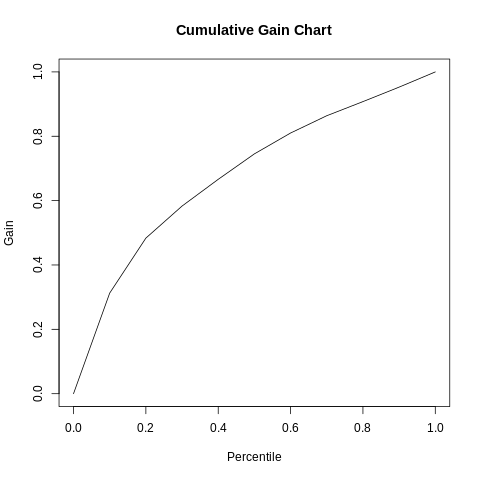

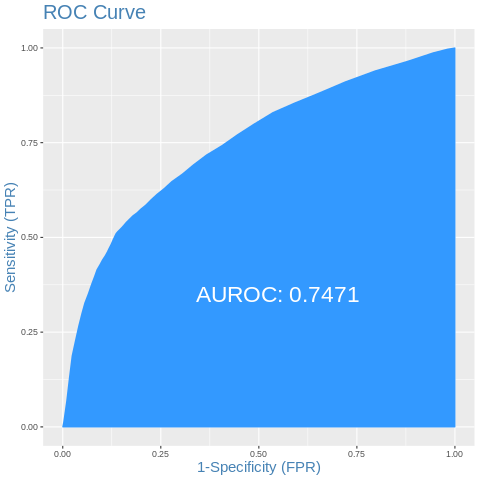

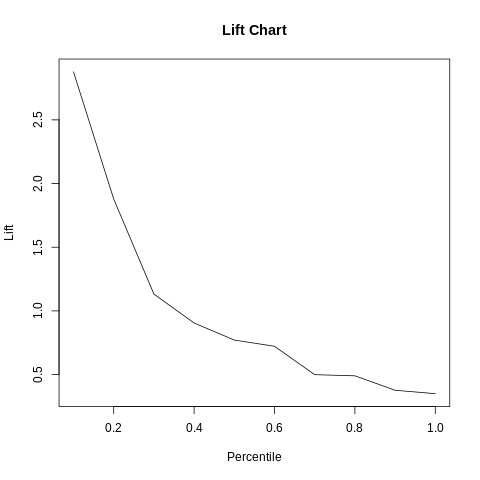

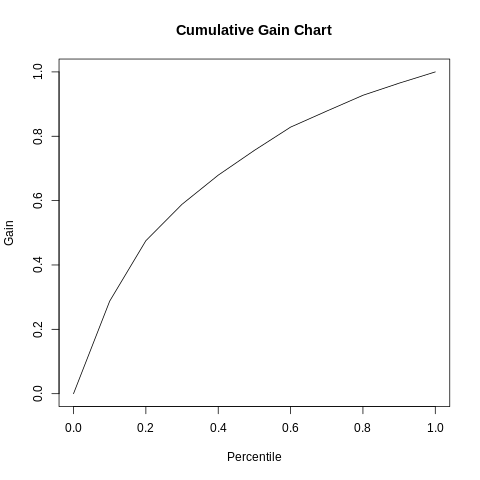

In [0]:
%%R

path <- '../gdrive/My Drive/BT2101 Group Project'

data.test <- read.csv(paste(path, 'data', 'card_test.csv', sep='/')) %>% as_tibble()

models <- list(
    naive.bayes.acc = readRDS(paste(path, 'models', 'model_nb_acc.rda', sep='/')),
    naive.bayes.f1 = readRDS(paste(path, 'models', 'model_nb_f1.rda', sep='/')),
    naive.bayes.auc = readRDS(paste(path, 'models', 'model_nb_AUC.rda', sep='/'))
)

metrics <- list(
    accuracy = acc,
    f1 = F1,
    AUROC = AUC,
    lift = lift,
    gain = gain
)

evaluate.models(models = models, data = data.test, metrics = metrics)

## Neural network

           model accuracy        f1     AUROC      lift     gain
1 neural.network   0.7196 0.4689394 0.7133881 0.8480392 0.663926


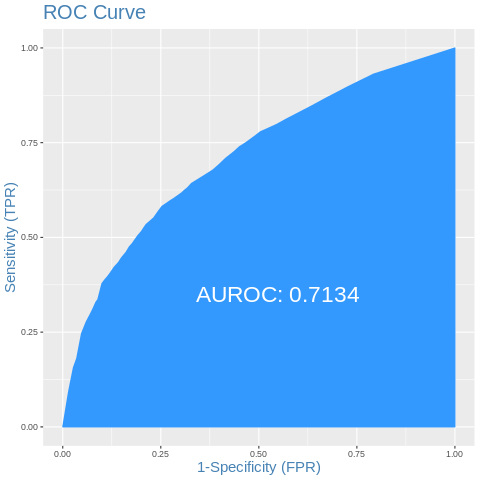

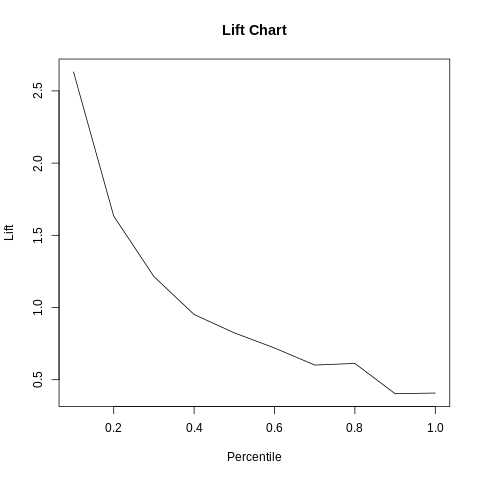

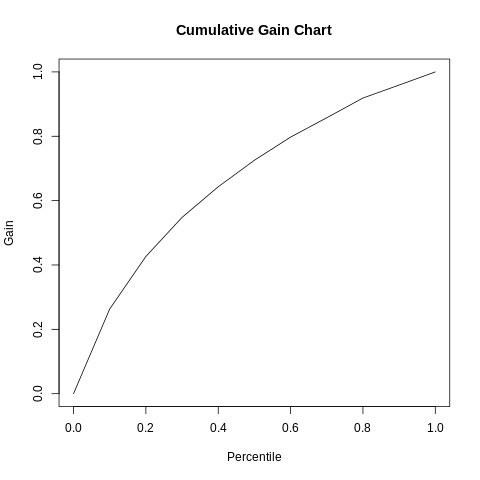

In [0]:
%%R

# Evaluation code
acc <- function(model, data) {
    y = data$DEFAULT
    y.pred = predict(model, newdata=data, type='class')
    return(mean(y == y.pred))
}

AUC <- function(model, data) {
    y = data$DEFAULT
    y.pred = predict(model, newdata=data, type='raw')
    
    M <- plotROC(y, y.pred, returnSensitivityMat = TRUE)
    x <- M[,1]
    y <- M[,2]

    W <- x[2:length(x)] - x[1:(length(x)-1)]
    H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
    
    return(W %*% H)
}

F1 <- function(model, data) {
    y = data$DEFAULT
    y.pred = predict(model, newdata=data, type='class')

    xtab <- table(factor(y, levels=c(1, 0)), 
                  factor(y.pred, levels=c(1, 0)))
    
    precision <- xtab[1,1] / sum(xtab[,1])
    recall <- xtab[1,1] / sum(xtab[1,])

    return(2 * (precision * recall) / (precision + recall))
}

gain <- function(model, data) {
  y = data$DEFAULT
  y.pred = predict(model, data, type = 'raw')
  
  # Combine the actual and pred
  df <- as.data.frame(cbind(y, y.pred))
  names(df) <- c("actual", "pred")
  
  # Order the prediction scores in descending order
  df <- df[order(-df$pred),]
  
  # Split into deciles
  df <- df %>% mutate(quantile = ntile(pred, 10))
  
  # Get total no. of positive instances
  total.positive = nrow(data[data$DEFAULT == 1,])
  
  # Calculate gain
  df.gains <- data.frame(Percentile = numeric(), Gain = numeric())
  df.gains <- rbind(df.gains, c(0, 0))
  perc = 0.1
  for (i in 1:10) {
    n <- sum(df[df$quantile == (11-i),]$actual) # number of positive instances
    g <- n / total.positive
    df.gains <- rbind(df.gains, c(perc, g))
    perc <- perc + 0.1
  }
  names(df.gains) <- c("Percentile", "Gain")
  
  # Calculate cumulative gain
  df.gains$CumGain <- cumsum(df.gains$Gain)
  
  # Calculate and return area under cumulative gain chart
  x <- df.gains$Percentile
  y <- df.gains$CumGain
  
  W <- x[2:length(x)] - x[1:(length(x)-1)]
  H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
  
  # Plot graph
  plot(df.gains$Percentile,df.gains$CumGain,type="l",xlab="Percentile",ylab="Gain", main = "Cumulative Gain Chart")
  
  return(W %*% H)
}


lift <- function(model, data) {
  y = data$DEFAULT
  y.pred = predict(model, data, type = 'raw')
  
  # Combine the actual and pred
  df <- as.data.frame(cbind(y, y.pred))
  names(df) <- c("actual", "pred")
  
  # Order the prediction scores in descending order
  df <- df[order(-df$pred),]
  
  # Split into deciles
  df <- df %>% mutate(quantile = ntile(pred, 10))
  
  # Get total no. of positive instances
  perc.positive = nrow(data[data$DEFAULT == 1,]) / nrow(data)
  
  # Calculate lift
  df.lift <- data.frame(Percentile = numeric(), Lift = numeric())
  perc = 0.1
  for (i in 1:10) {
    n <- sum(df[df$quantile == (11-i),]$actual) # number of positive instances
    p <- n / nrow(df[df$quantile == (11-i),])
    l <- p / perc.positive
    df.lift <- rbind(df.lift, c(perc, l))
    perc <- perc + 0.1
  }
  names(df.lift) <- c("Percentile", "Lift")
  
  # Calculate cumulative gain
  df.lift$CumLift <- cumsum(df.lift$Lift)
  
  # Calculate and return area under cumulative gain chart
  x <- df.lift$Percentile
  y <- df.lift$Lift
  
  W <- x[2:length(x)] - x[1:(length(x)-1)]
  H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
  
  # Plot graph
  plot(df.lift$Percentile, df.lift$Lift,type="l",xlab="Percentile",ylab="Lift", main = "Lift Chart")
  
  return(W %*% H)
}


path <- '../gdrive/My Drive/BT2101 Group Project'

data.test <- read.csv(paste(path, 'data', 'card_test.csv', sep='/')) %>% as_tibble()

models <- list(
    # logistic.regression = readRDS(paste(path, 'models', 'model_lr.rda', sep='/')), # type = {link, response, terms}
    # decision.tree = readRDS(paste(path, 'models', 'model_CARTtree.rda', sep='/')), # type = {prob, class, matrix}
    # random.forest = readRDS(paste(path, 'models', 'model_rf.rda', sep='/')), # Loading this returns a weird object ):
    # naive.bayes.f1 = readRDS(paste(path, 'models', 'model_nb_f1.rda', sep='/')), # type = {class, prob}
    # svm = readRDS(paste(path, 'models', 'model_???.rda', sep='/')),
    neural.network = readRDS(paste(path, 'models', 'model_nn.rda', sep='/')) # Loading this returns a weird object ):
)

metrics <- list(
    accuracy = acc,
    f1 = F1,
    AUROC = AUC,
    lift = lift,
    gain = gain
)

evaluate.models(models = models, data = data.test, metrics = metrics)

## SVM

In [0]:
%%R

install.packages(c('InformationValue', 'e1071'))
library(InformationValue)
library(e1071)

# Evaluation code
acc <- function(model, data) {
    y = as.factor(data$DEFAULT)
    y.pred = predict(model, newdata=data)

    return(mean(y == y.pred))
}

AUC <- function(model, data) {
    y = data$DEFAULT
    y.pred = attr(predict(model, data, probability=TRUE), 'probabilities')[,1]
  
    M <- plotROC(y, y.pred, returnSensitivityMat = TRUE)
    x <- M[,1]
    y <- M[,2]

    W <- x[2:length(x)] - x[1:(length(x)-1)]
    H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
    
    return(W %*% H)
}

F1 <- function(model, data) {
    y = as.factor(data$DEFAULT)
    y.pred = predict(model, newdata=data)
    # y.pred = predict(model, newdata=data)

    xtab <- table(factor(y, levels=c(1, 0)), 
                  factor(y.pred, levels=c(1, 0)))
    
    precision <- xtab[1,1] / sum(xtab[,1])
    recall <- xtab[1,1] / sum(xtab[1,])

    return(2 * (precision * recall) / (precision + recall))
}

gain <- function(model, data) {
  y = data$DEFAULT
  y.pred = attr(predict(model, data, probability=TRUE), 'probabilities')[,1]
  
  # Combine the actual and pred
  df <- as.data.frame(cbind(y, y.pred))
  names(df) <- c("actual", "pred")
  
  # Order the prediction scores in descending order
  df <- df[order(-df$pred),]
  
  # Split into deciles
  df <- df %>% mutate(quantile = ntile(pred, 10))
  
  # Get total no. of positive instances
  total.positive = nrow(data[data$DEFAULT == 1,])
  
  # Calculate gain
  df.gains <- data.frame(Percentile = numeric(), Gain = numeric())
  df.gains <- rbind(df.gains, c(0, 0))
  perc = 0.1
  for (i in 1:10) {
    n <- sum(df[df$quantile == (11-i),]$actual) # number of positive instances
    g <- n / total.positive
    df.gains <- rbind(df.gains, c(perc, g))
    perc <- perc + 0.1
  }
  names(df.gains) <- c("Percentile", "Gain")
  
  # Calculate cumulative gain
  df.gains$CumGain <- cumsum(df.gains$Gain)
  
  # Calculate and return area under cumulative gain chart
  x <- df.gains$Percentile
  y <- df.gains$CumGain
  
  W <- x[2:length(x)] - x[1:(length(x)-1)]
  H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
  
  # Plot graph
  plot(df.gains$Percentile,df.gains$CumGain,type="l",xlab="Percentile",ylab="Gain", main = "Cumulative Gain Chart")
  
  return(W %*% H)
}

lift <- function(model, data) {
  y = data$DEFAULT
  y.pred = attr(predict(model, data, probability=TRUE), 'probabilities')[,1]
  
  # Combine the actual and pred
  df <- as.data.frame(cbind(y, y.pred))
  names(df) <- c("actual", "pred")
  
  # Order the prediction scores in descending order
  df <- df[order(-df$pred),]
  
  # Split into deciles
  df <- df %>% mutate(quantile = ntile(pred, 10))
  
  # Get total no. of positive instances
  perc.positive = nrow(data[data$DEFAULT == 1,]) / nrow(data)
  
  # Calculate lift
  df.lift <- data.frame(Percentile = numeric(), Lift = numeric())
  perc = 0.1
  for (i in 1:10) {
    n <- sum(df[df$quantile == (11-i),]$actual) # number of positive instances
    p <- n / nrow(df[df$quantile == (11-i),])
    l <- p / perc.positive
    df.lift <- rbind(df.lift, c(perc, l))
    perc <- perc + 0.1
  }
  names(df.lift) <- c("Percentile", "Lift")
  
  # Calculate cumulative gain
  df.lift$CumLift <- cumsum(df.lift$Lift)
  
  # Calculate and return area under cumulative gain chart
  x <- df.lift$Percentile
  y <- df.lift$Lift
  
  W <- x[2:length(x)] - x[1:(length(x)-1)]
  H <- (y[2:length(x)] + y[1:(length(x)-1)]) / 2
  
  # Plot graph
  plot(df.lift$Percentile, df.lift$Lift,type="l",xlab="Percentile",ylab="Lift", main = "Lift Chart")
  
  return(W %*% H)
}

evaluate.models <- function(models, data, metrics) {
    result <- data.frame(matrix(nrow=0, ncol=length(metrics)))
    
    for (model.name in names(models)) {
        model <- models[[model.name]]
        model.metrics <- metrics %>% sapply((function(f) f(model, data)))
        result <- rbind(result, model.metrics)
    }

    result <- cbind(names(models), result)
    names(result) <- append('model', names(metrics))
    return(result)
}

            model accuracy        f1     AUROC     lift      gain
1 naive.bayes.acc   0.6664 0.3862006 0.5440466 0.902852 0.5823084


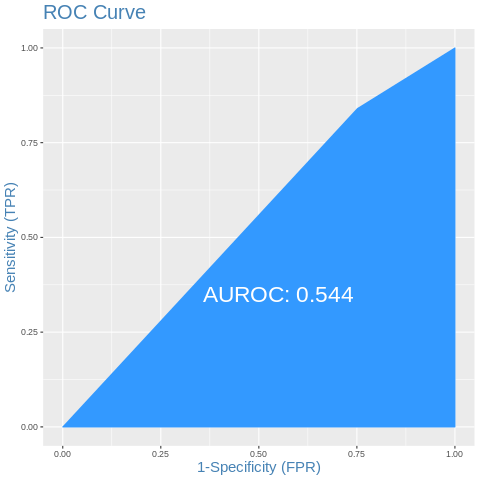

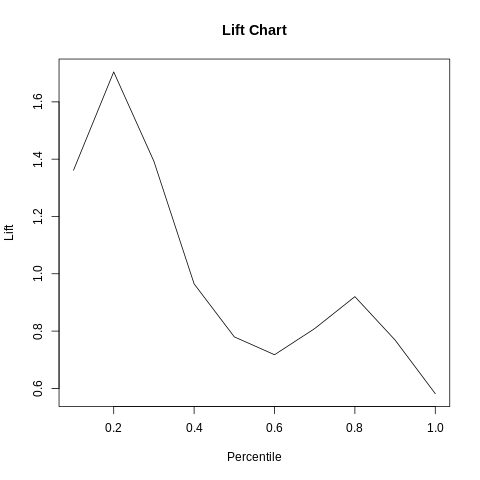

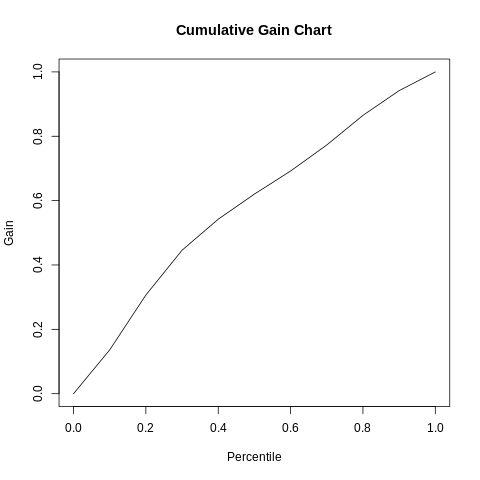

In [0]:
%%R

path <- '../gdrive/My Drive/BT2101 Group Project'

data.test <- read.csv(paste(path, 'data', 'card_test.csv', sep='/')) %>% as_tibble()

models <- list(
    naive.bayes.acc = readRDS(paste(path, 'models', 'model_svm.rda', sep='/'))
)

metrics <- list(
    accuracy = acc,
    f1 = F1,
    AUROC = AUC,
    lift = lift,
    gain = gain
)

evaluate.models(models = models, data = data.test, metrics = metrics)